In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial.distance import jensenshannon
import geopandas as gpd

from PopSynthesis.Methods.connect_HH_PP.paras_dir import processed_data, output_dir, data_dir
from PopSynthesis.Methods.connect_HH_PP.scripts.utils import convert_full_to_marg_count

In [2]:
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "POA"

In [4]:
syn_hh_bn = pd.read_csv(os.path.join(output_dir,"new_test", f"syn_hh_final_POA_ad5.csv"))
syn_pp_bn = pd.read_csv(os.path.join(output_dir,"new_test", f"syn_pp_final_POA_ad5.csv"))
syn_hh_ipu = pd.read_csv(os.path.join(output_dir, "new_test","syn_hh_ipu.csv"))
syn_pp_ipu = pd.read_csv(os.path.join(output_dir, "new_test","syn_pp_ipu.csv"))
syn_hh_noad = pd.read_csv(os.path.join(output_dir, "new_test", f"hh_no_adjustments.csv"))
syn_pp_noad = pd.read_csv(os.path.join(output_dir, "new_test", f"pp_no_adjustments.csv"))

In [5]:
syn_hh_bn = syn_hh_bn.astype(str)
syn_pp_bn = syn_pp_bn.astype(str)
syn_hh_ipu = syn_hh_ipu.astype(str)
syn_pp_ipu = syn_pp_ipu.astype(str)
syn_hh_noad = syn_hh_noad.astype(str)
syn_pp_noad = syn_pp_noad.astype(str)

In [6]:
marg_hh = pd.read_csv(os.path.join(data_dir,f"hh_marginals_ipu.csv"), header=[0,1])
marg_pp = pd.read_csv(os.path.join(data_dir,f"person_marginals_ipu.csv"), header=[0,1])

In [7]:
hold = marg_hh.columns[marg_hh.columns.get_level_values(0)=="zone_id"]
marg_hh = marg_hh.set_index(hold[0])
marg_hh.index.name = geo_lev
marg_hh

sample_geog hhsize                                   \
     Unnamed: 1_level_1      1     2     3    4    5   6  7  8+   
POA                                                               
3000                  2  10393  8524  2026  656  118  27  4  58   
3002                  2   1035  1019   190  101   38   9  0  55   
3003                  2   1504  1591   476  223   40  11  7  55   
3004                  2   2566  2382   511  227   33   6  5  55   
3006                  2   5113  5033  1280  414   59  13  8  58   
...                 ...    ...   ...   ...  ...  ...  .. ..  ..   
3990                  2      6    20     8    4    3   0  0  55   
3991                  2     37    65    16   19   10   9  0  55   
3992                  2    134   201    72   60   24   9  0  55   
3995                  2   1663  1834   629  451  228  73  8  58   
3996                  2    806  1176   251  299  137  31  6  59   

             dwelltype  ...      hhinc totalvehs                        \
     Flat or Apartment  ... Nil income         0     1     2    3   4+   
POA                     ...                                              
3000             21546  ...       1916     14688  5445   861  397  415   
3002              1877  ...         42       478  1268   545   89   67   
3003              3187  ...        159      1401  1937   420   93   56   
3004              5741  ...        172      1198  3442   882  168   95   
3006             11783  ...        435      4725  5884  1026  193  150   
...                ...  ...        ...       ...   ...   ...  ...  ...   
3990                 0  ...          3        13    12    30   25   16   
3991                 0  ...          6        20    46    66   42   37   
3992                 0  ...          9        12   153   218   93   79   
3995                25  ...         87       380  1949  1692  585  338   
3996                12  ...         55        88  1040  1207  298  132   

            owndwell                                          
     Being Purchased Being Rented Fully Owned Something Else  
POA                                                           
3000            2453        16601        2284            468  
3002             434         1298         673             42  
3003             797         2548         463             99  
3004            1207         3212        1268             98  
3006            2136         8092        1537            213  
...              ...          ...         ...            ...  
3990              16            0          22             58  
3991              51           17          67             76  
3992             229           55         192             79  
3995            1326         1150        2316            152  
3996             690          494        1525             56  

[691 rows x 45 columns]

In [8]:
hold = marg_pp.columns[marg_pp.columns.get_level_values(0)=="zone_id"]
marg_pp = marg_pp.set_index(hold[0])
marg_pp.index.name = geo_lev
marg_pp

age                                                         ...  \
       0-9 10-19 100+  20-29  30-39 40-49 50-59 60-69 70-79 80-89  ...   
POA                                                                ...   
3000  1131  2057    0  21588  10739  3433  2059  1275   619   145  ...   
3002   210   179    0    840   1032   571   614   683   537   165  ...   
3003   428   380    0   2837   2331   919   560   308   163    42  ...   
3004   604   407    9   2432   2928  1530  1111  1048   953   317  ...   
3006  1107   709    0   7932   7118  2452  1454  1108   612   187  ...   
...    ...   ...  ...    ...    ...   ...   ...   ...   ...   ...  ...   
3990     3     7    0      3     13    12    25    27    26     0  ...   
3991    29    47    0     41     42    40    65    63    49    12  ...   
3992   146   144    0    130    156   164   164   232   106    25  ...   
3995  1054  1202    4   1045   1159  1181  1494  1934  1565   691  ...   
3996   652   658    2    365    602   651   775  1272  1070   427  ...   

           persinc                                              \
     $400-599 p.w. $600-799 p.w. $800-999 p.w. Missing/Refused   
POA                                                              
3000          4049          4688          3585            5585   
3002           274           330           239             621   
3003           563           711           602            1190   
3004           984          1106           699            1967   
3006          1460          1933          1709            2693   
...            ...           ...           ...             ...   
3990             8            15             5              22   
3991            41            34            27             102   
3992           139           137            99             311   
3995          1837          1408           782            2457   
3996           794           728           425            1394   

                                    sex        anywork         
     Negative Income Zero Income      F      M       N      Y  
POA                                                            
3000             227        7764  21539  24113   15853  29799  
3002              24         686   2545   2837    1855   3527  
3003              29         618   3899   4077    2575   5401  
3004              36         737   5827   6478    4589   7716  
3006              73        2119  11197  11941    6568  16570  
...              ...         ...    ...    ...     ...    ...  
3990               3           9     61     55      44     72  
3991               4          26    194    194     202    186  
3992              10          55    630    641     599    672  
3995              73         556   5960   5533    6687   4806  
3996              36         310   3412   3149    3832   2729  

[691 rows x 28 columns]

In [9]:
# Polynomial Regression
def r_squared(x, y, degree):
    results = {}

    coeffs = np.polyfit(x, y, degree)

     # Polynomial Coefficients
    results['polynomial'] = coeffs.tolist()

    # r-squared
    p = np.poly1d(coeffs)
    # fit values, and mean
    yhat = p(x)                         # or [p(z) for z in x]
    ybar = np.sum(y)/len(y)          # or sum(y)/len(y)
    ssreg = np.sum((yhat-ybar)**2)   # or sum([ (yihat - ybar)**2 for yihat in yhat])
    sstot = np.sum((y - ybar)**2)    # or sum([ (yi - ybar)**2 for yi in y])
    results['determination'] = ssreg / sstot

    return results

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_12408\3028700886.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))
C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_12408\1836707500.py:17: RuntimeWarning: invalid value encountered in scalar divide
  results['determination'] = ssreg / sstot


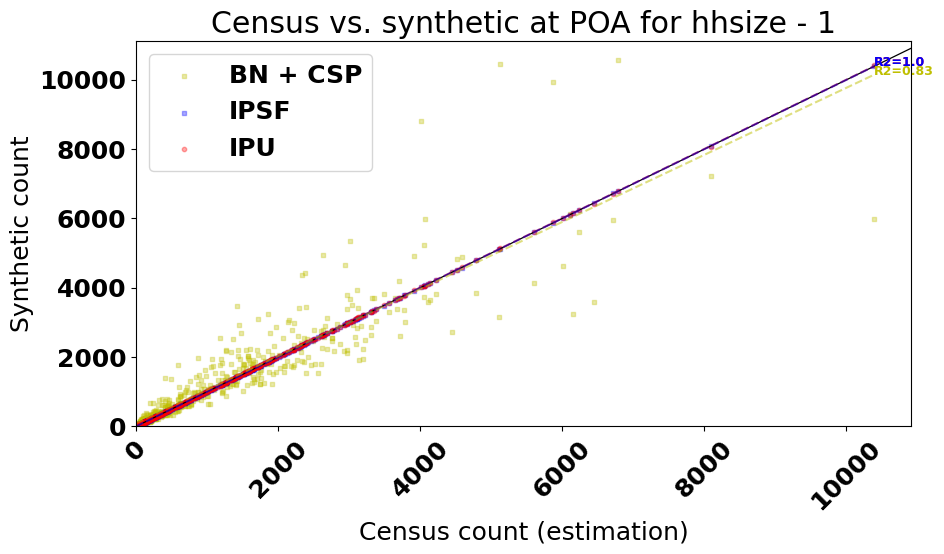

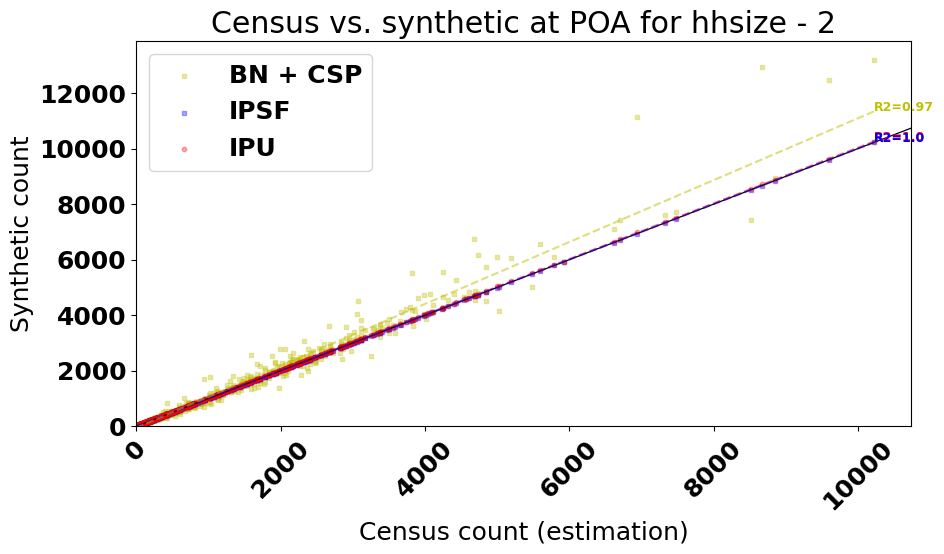

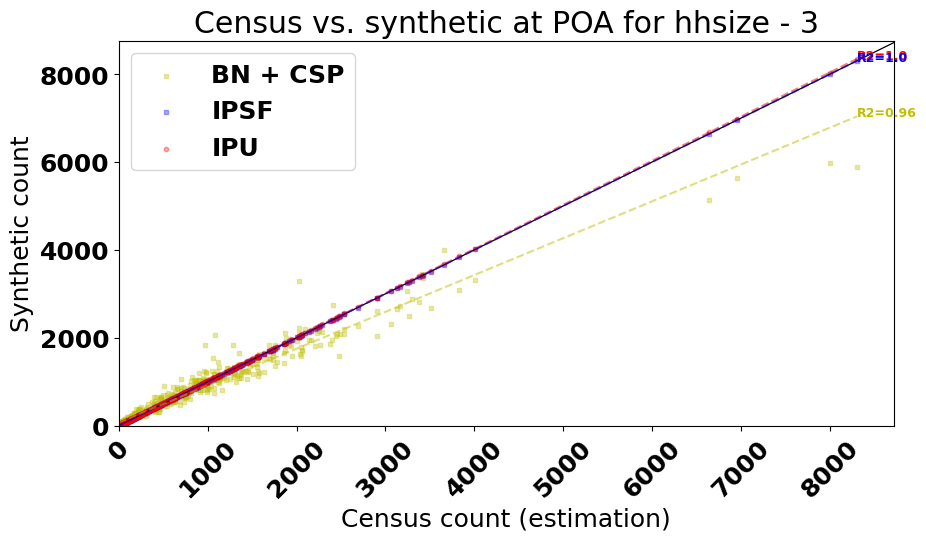

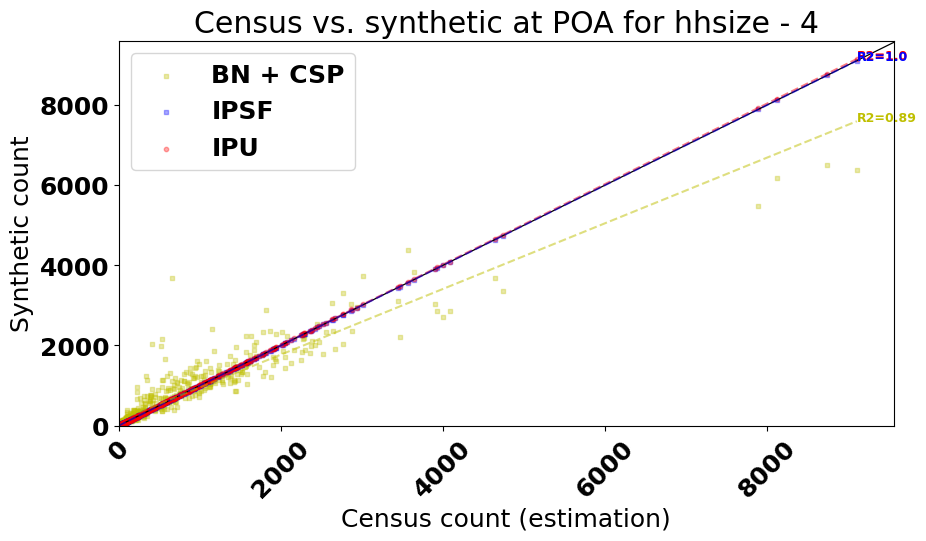

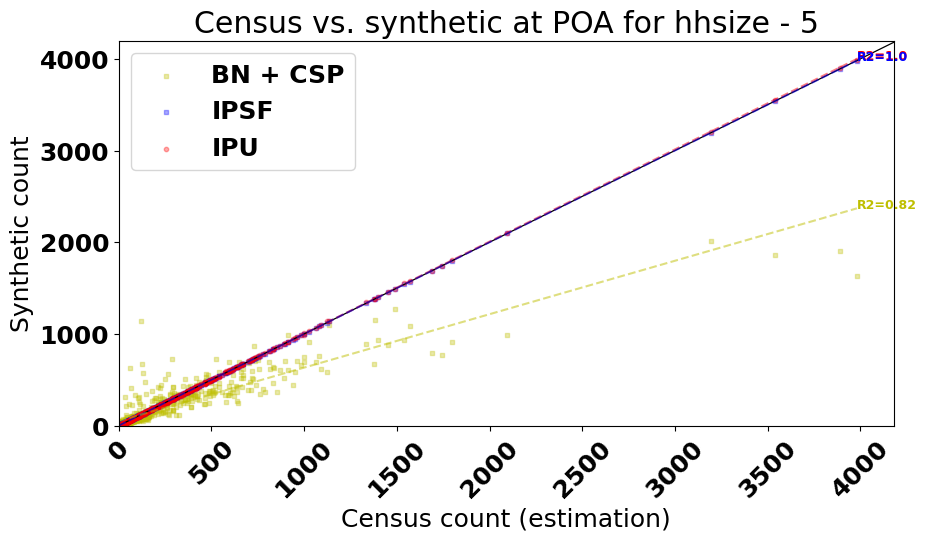

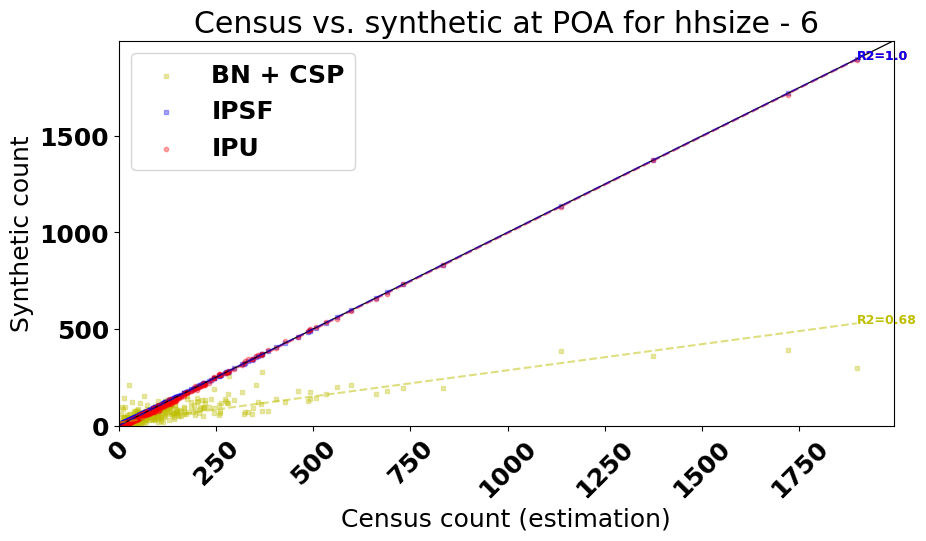

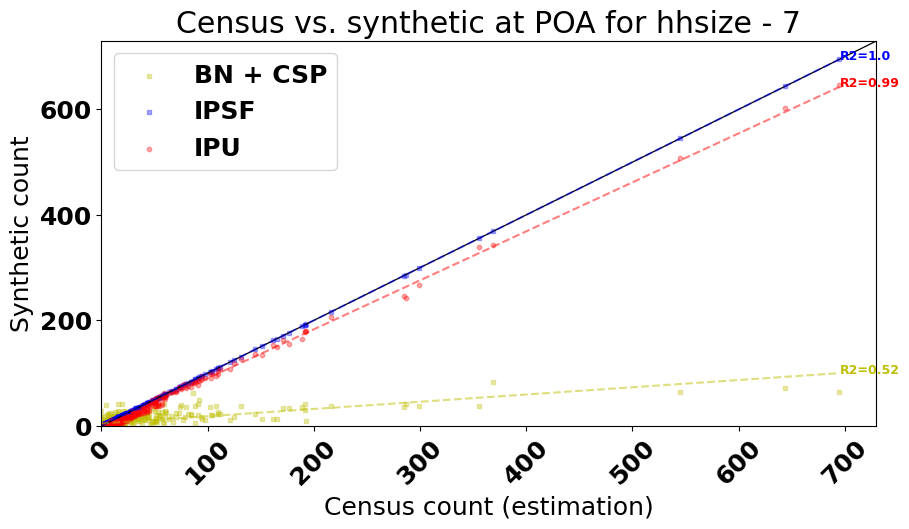

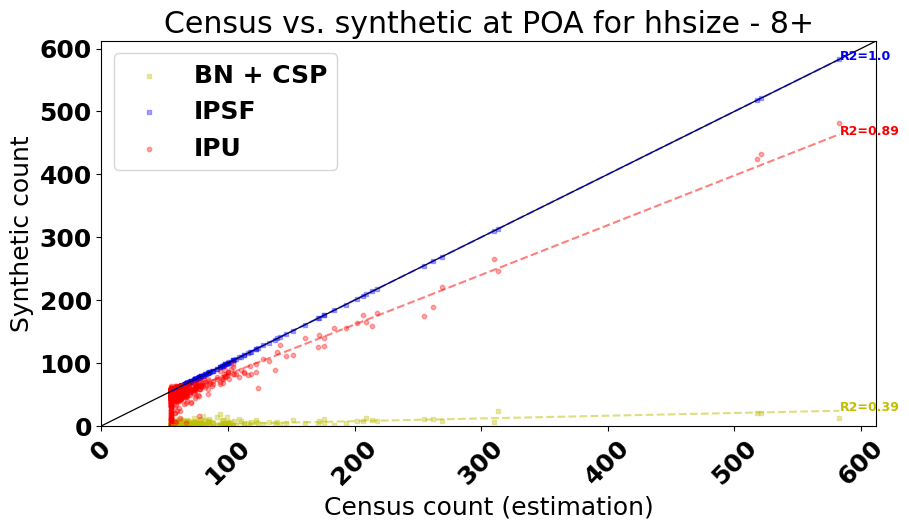

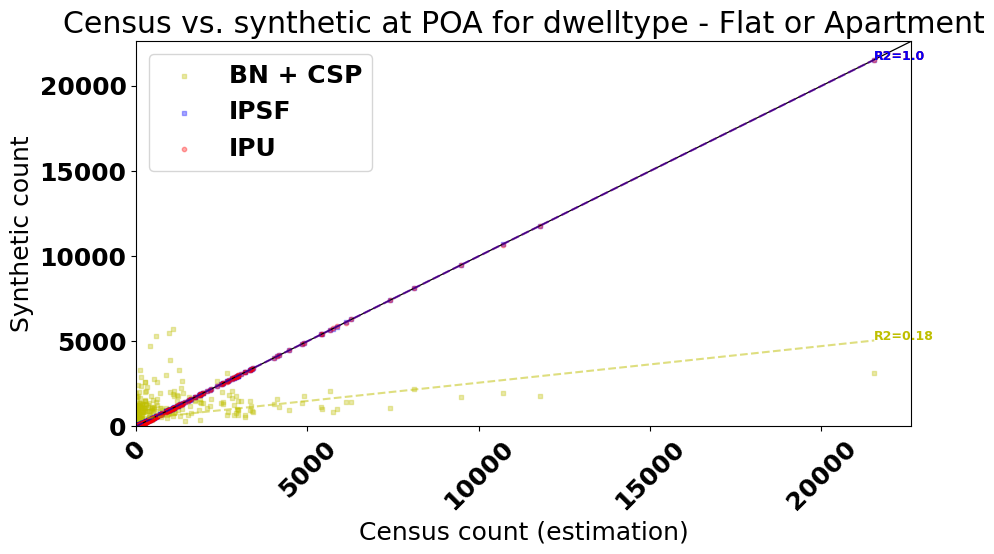

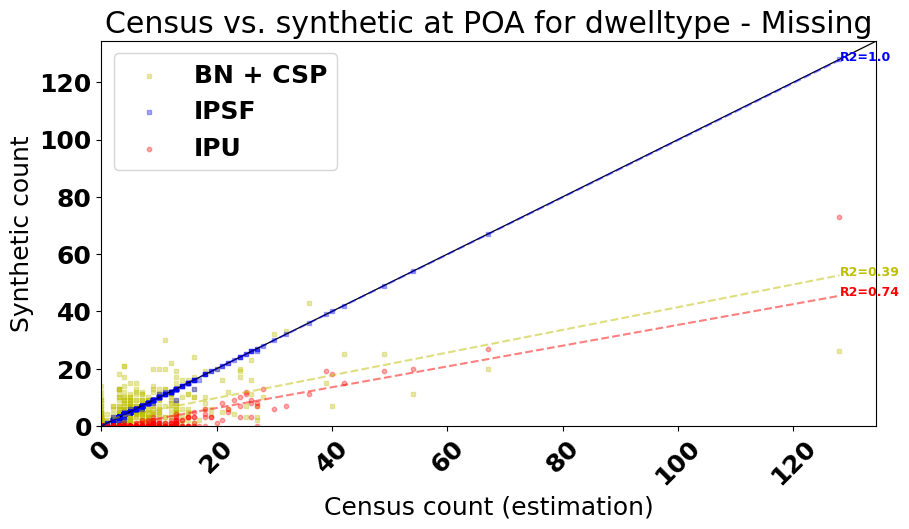

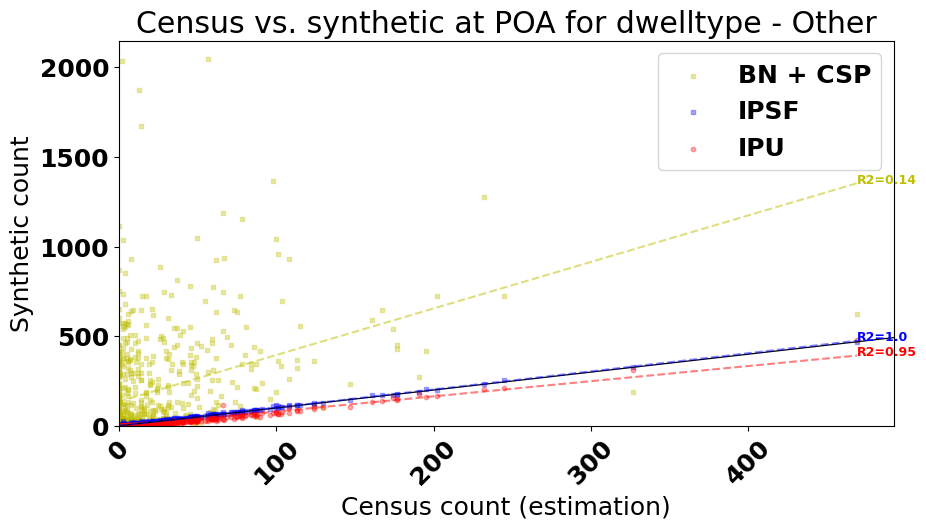

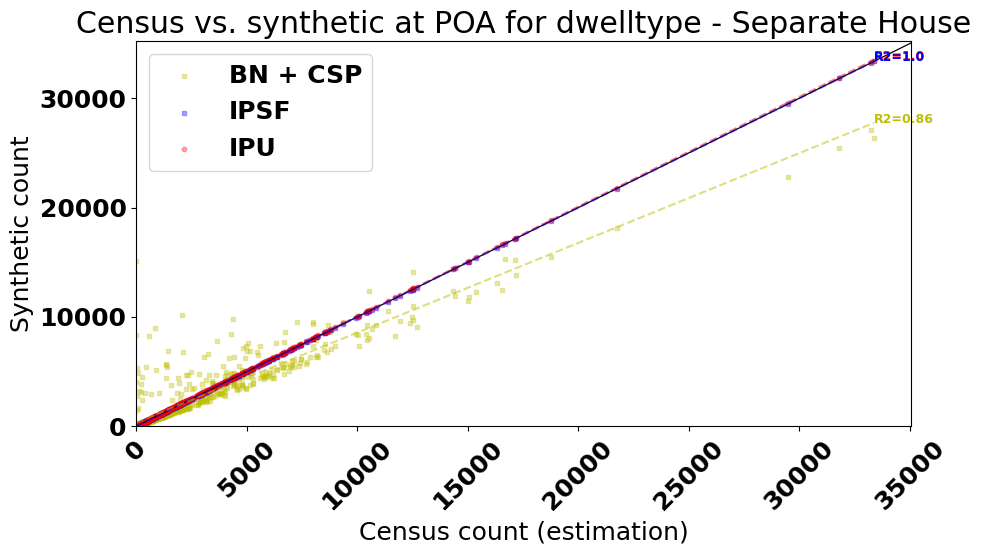

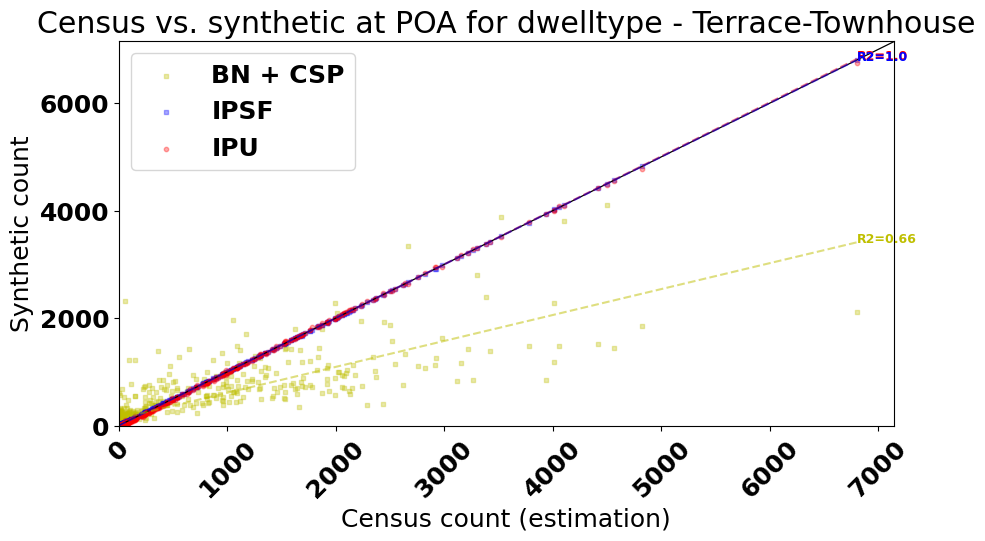

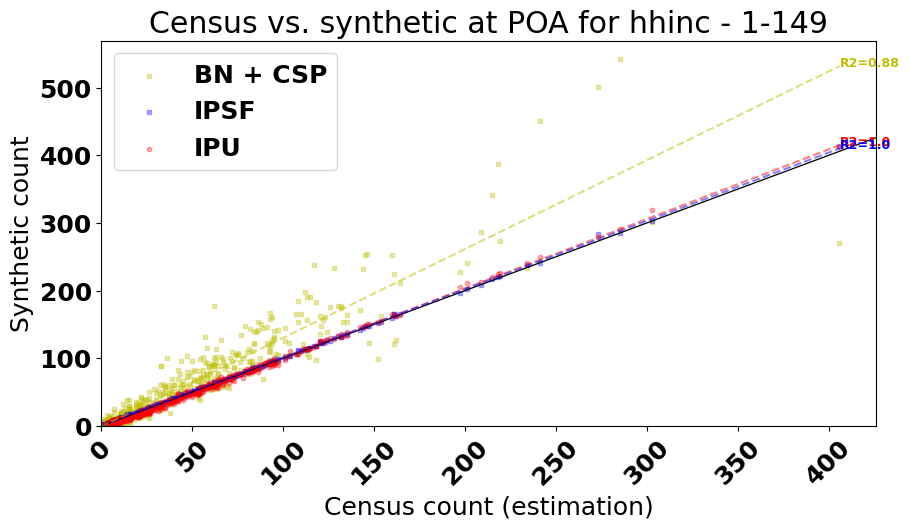

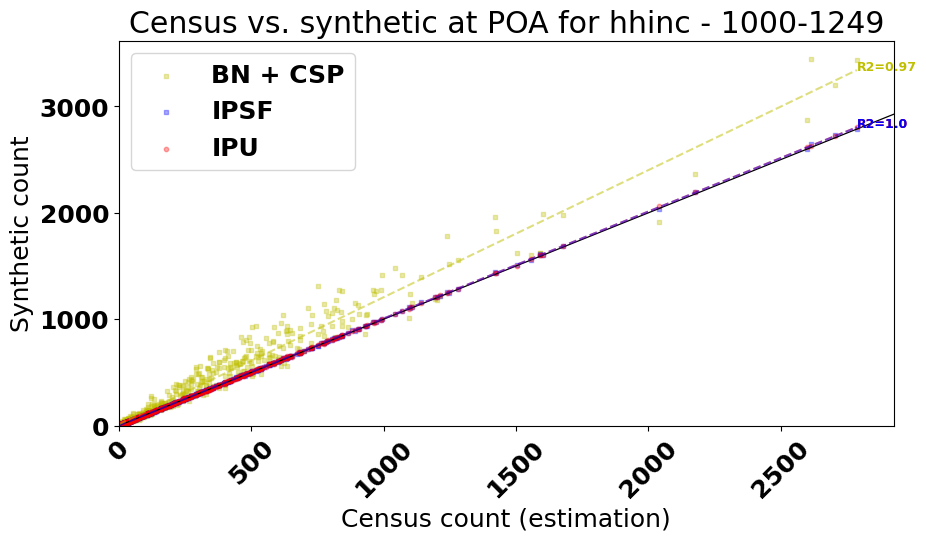

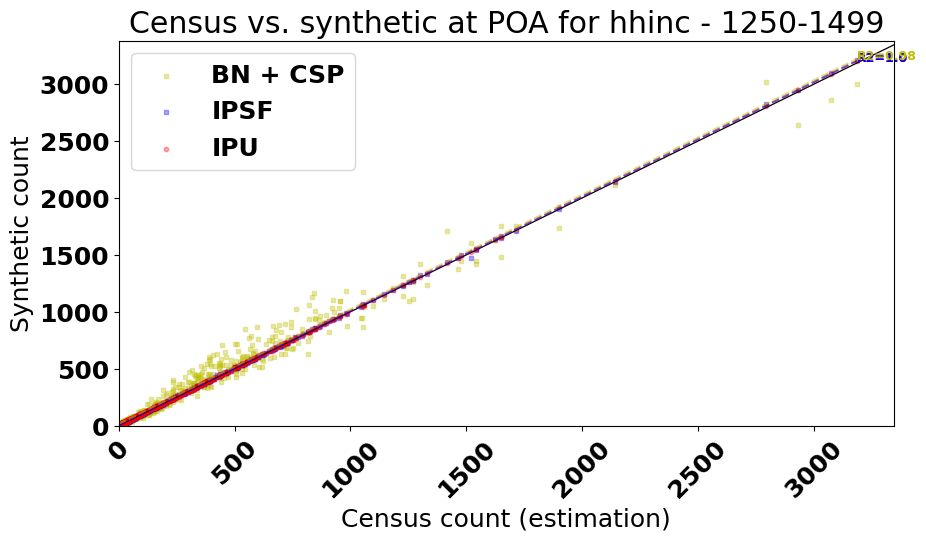

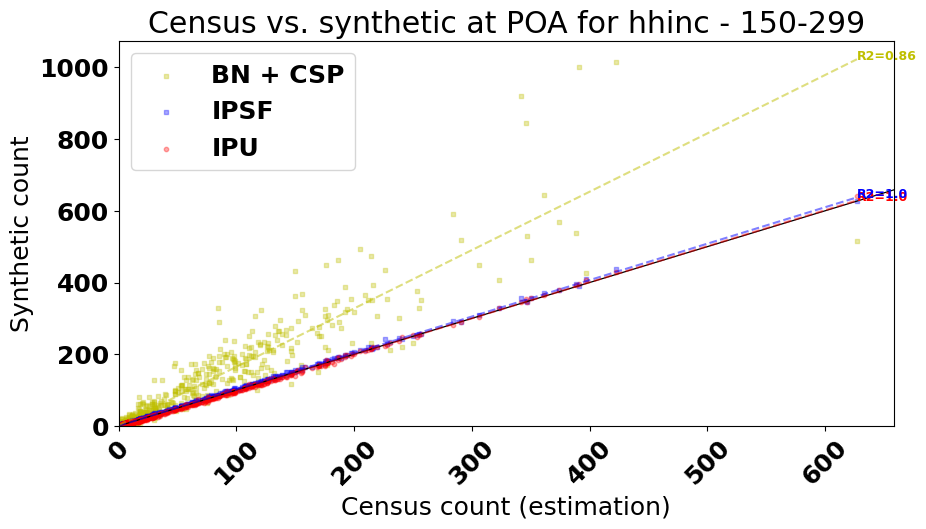

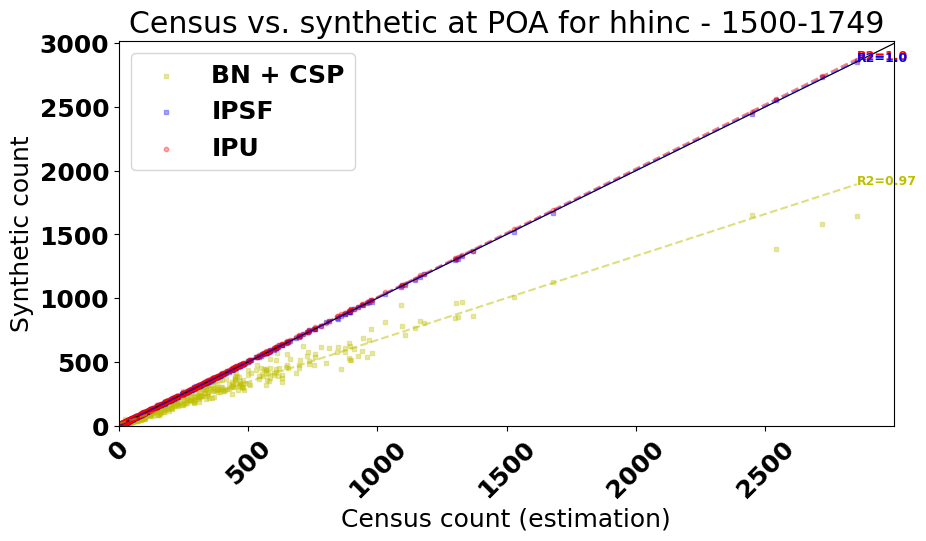

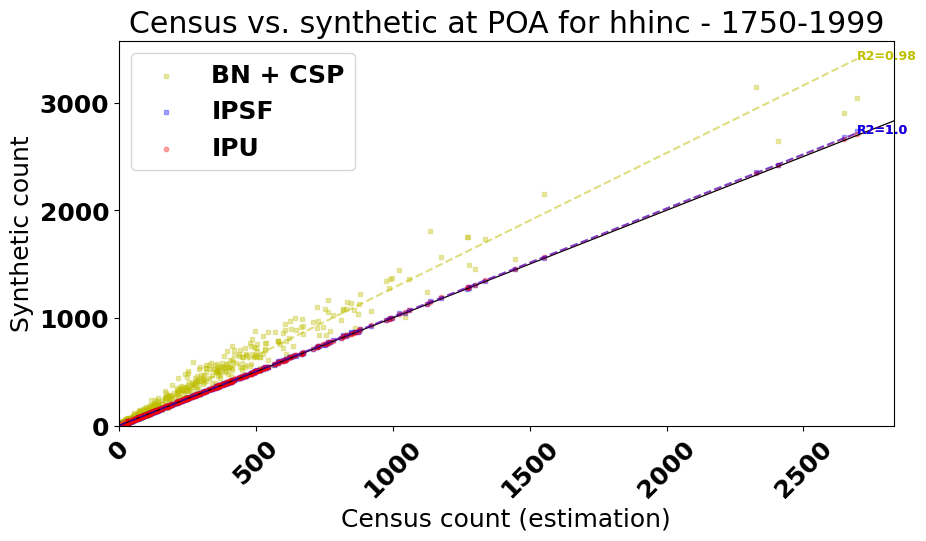

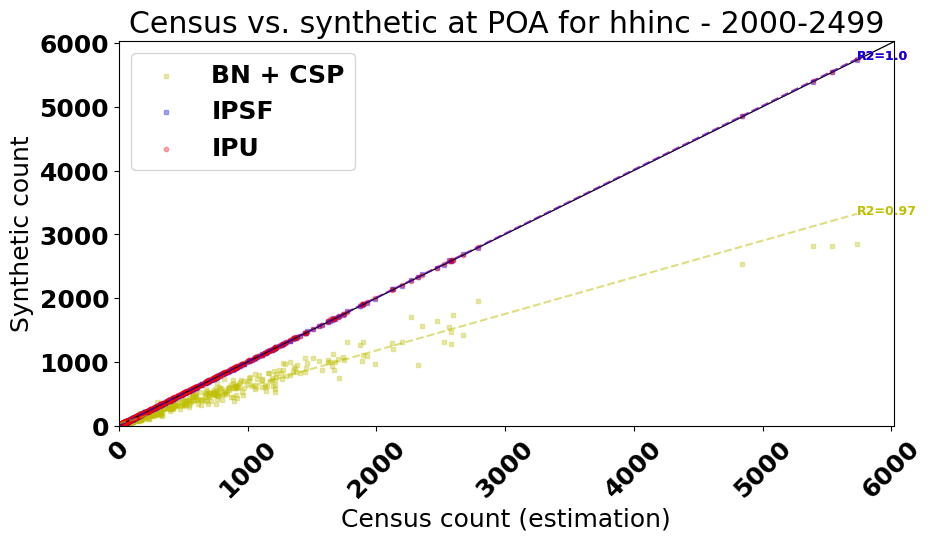

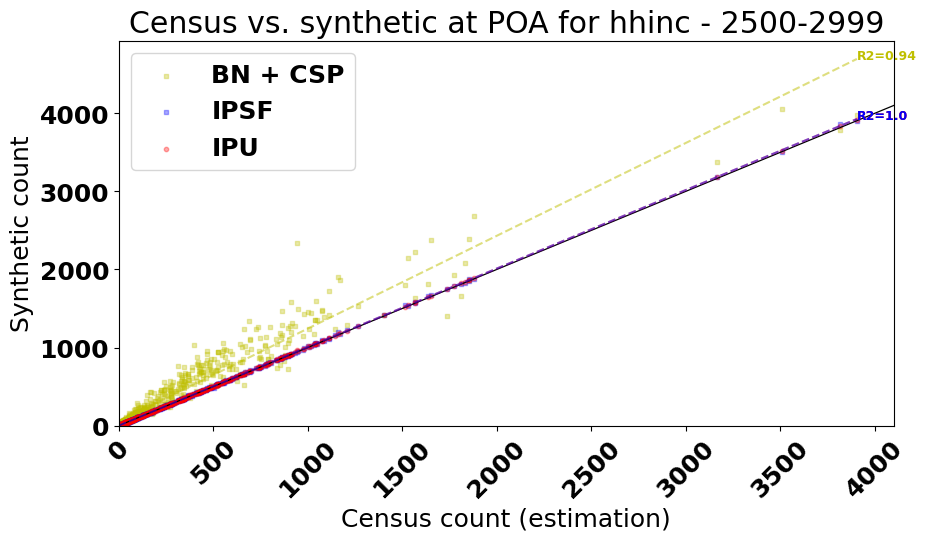

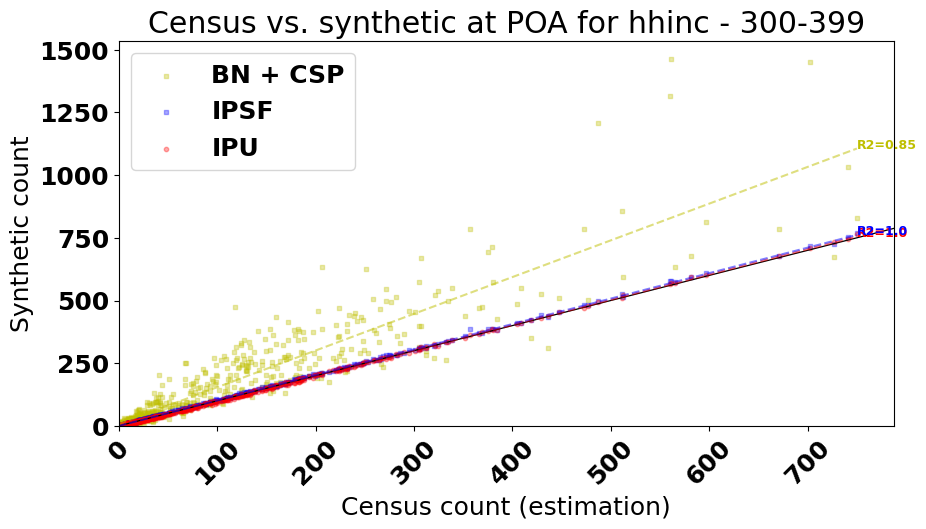

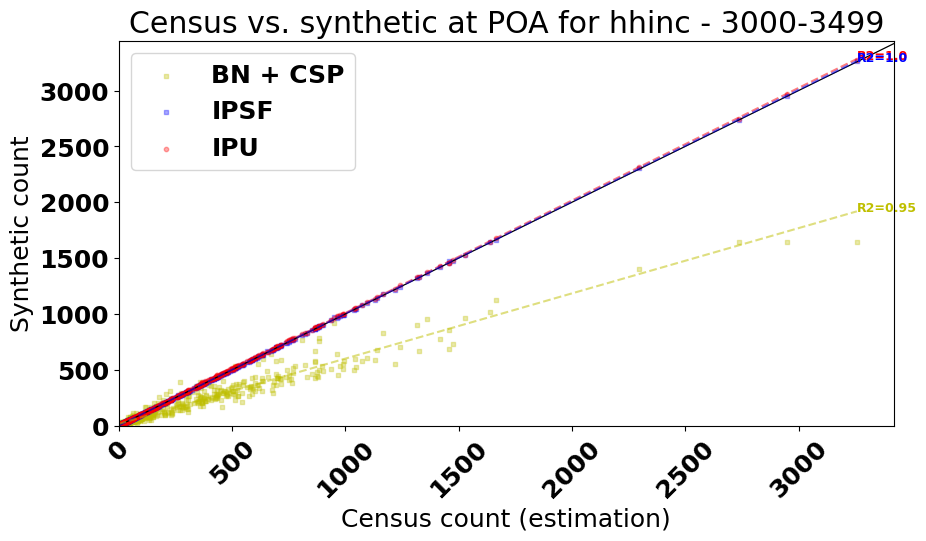

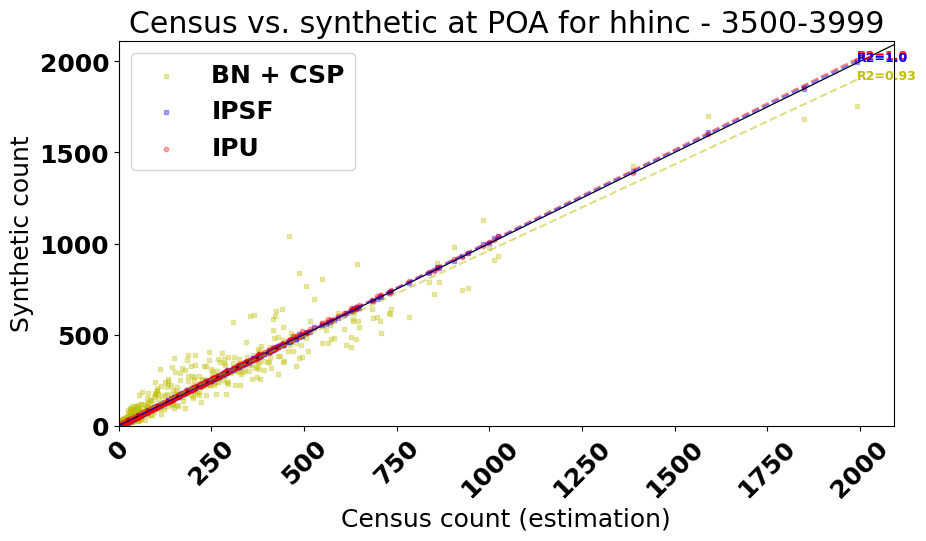

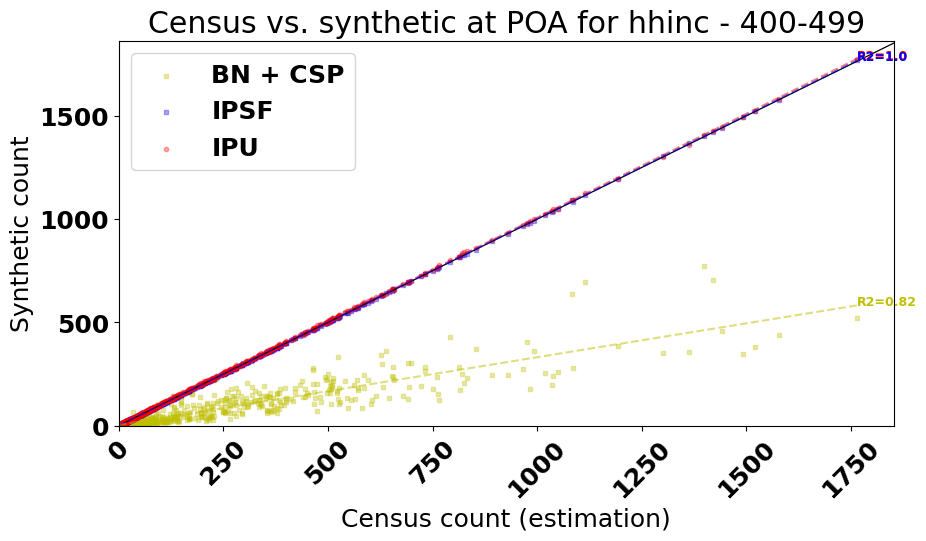

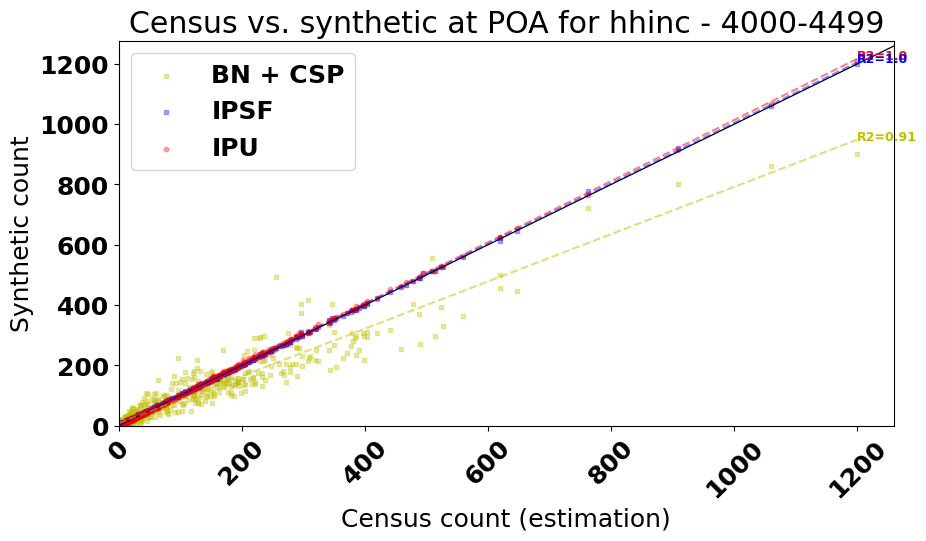

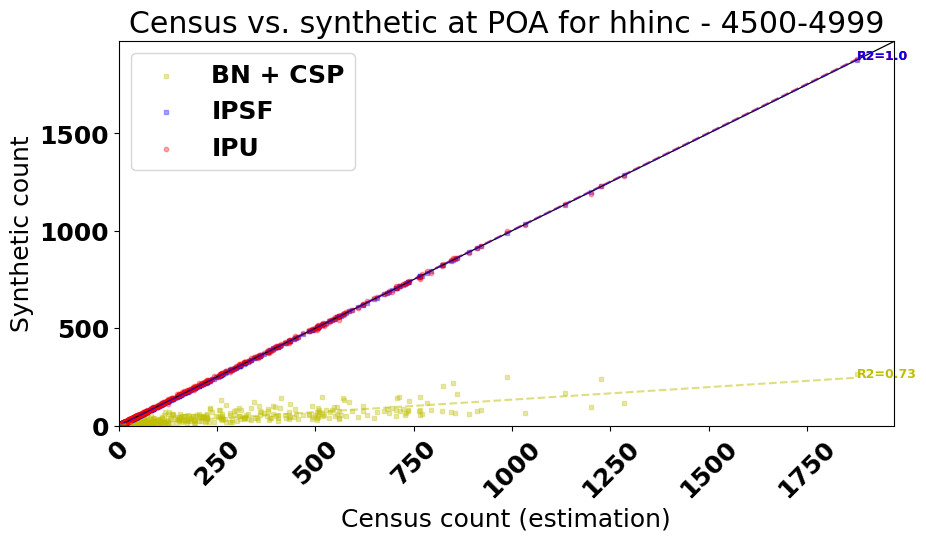

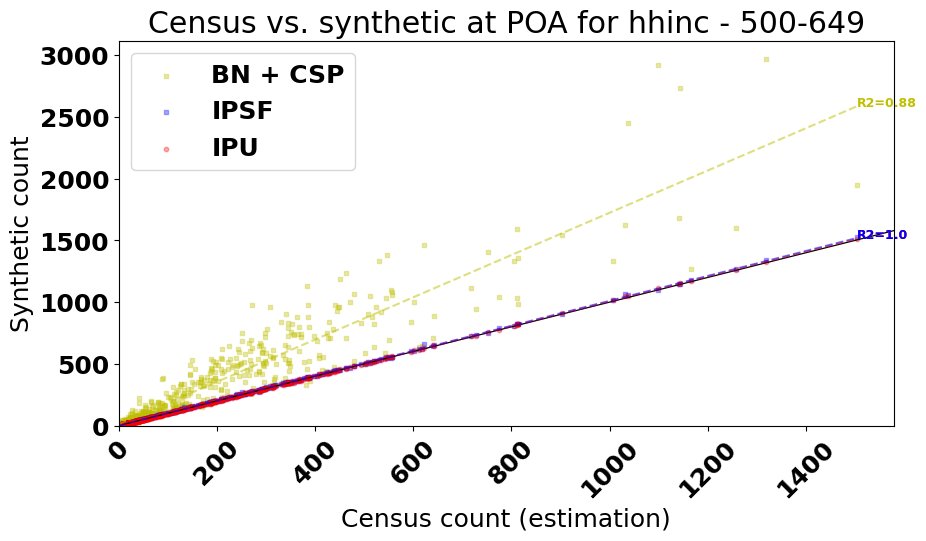

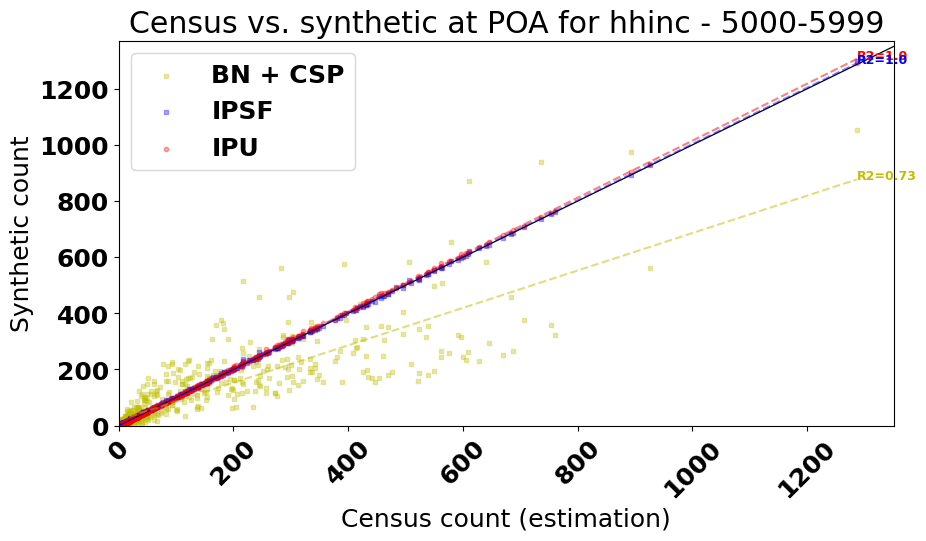

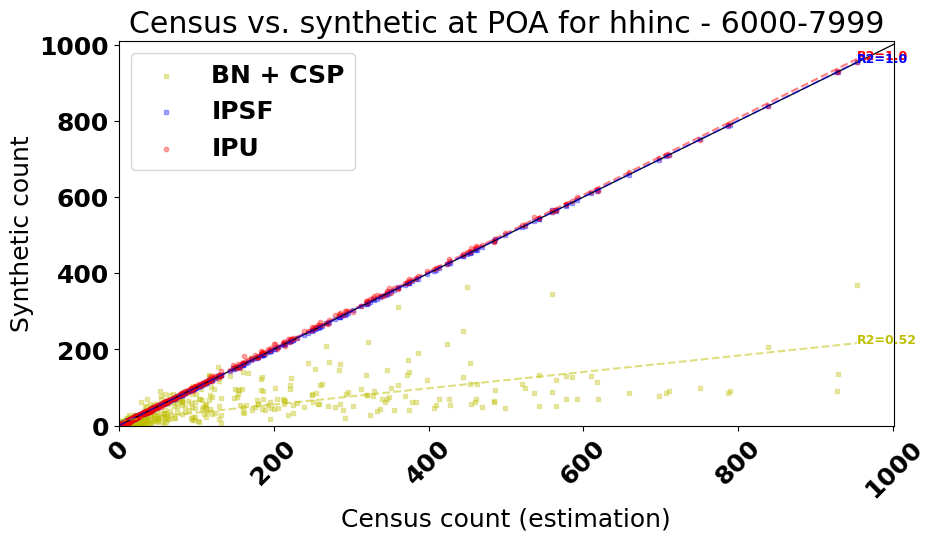

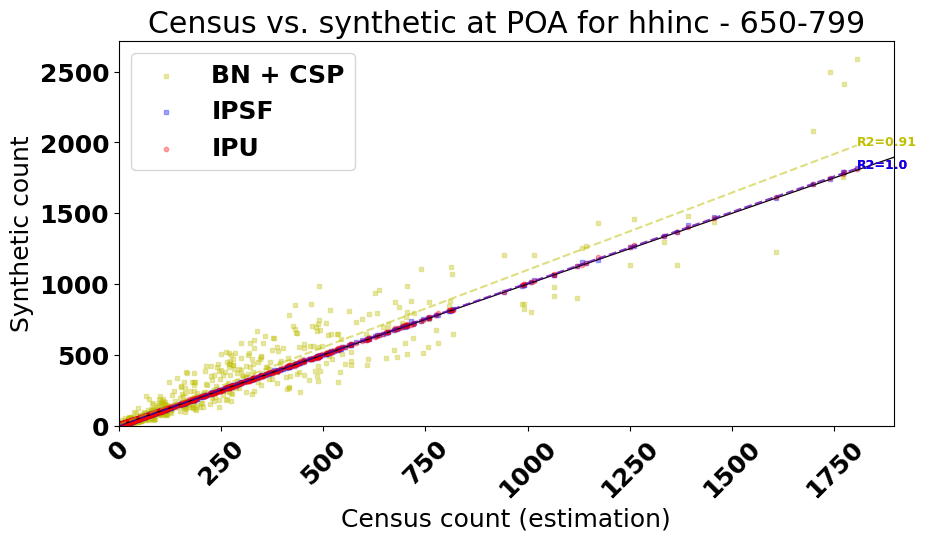

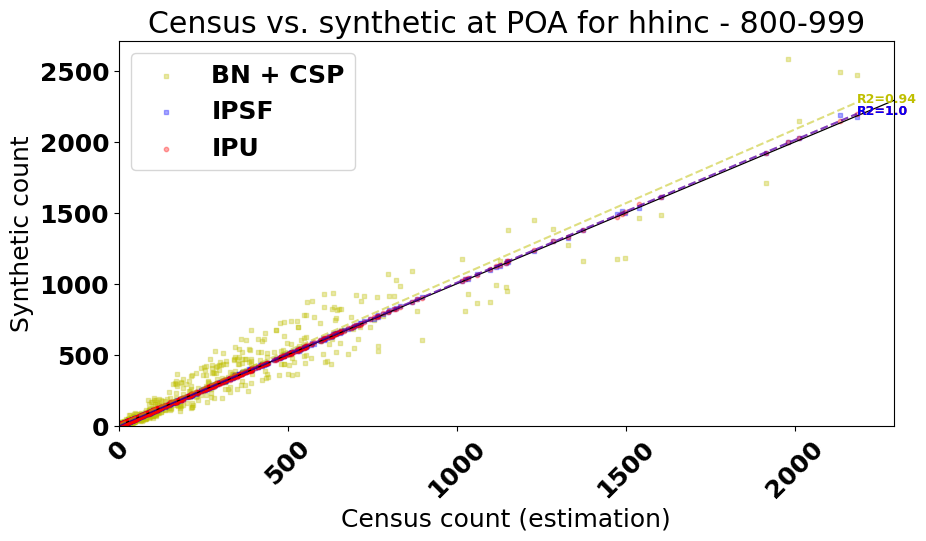

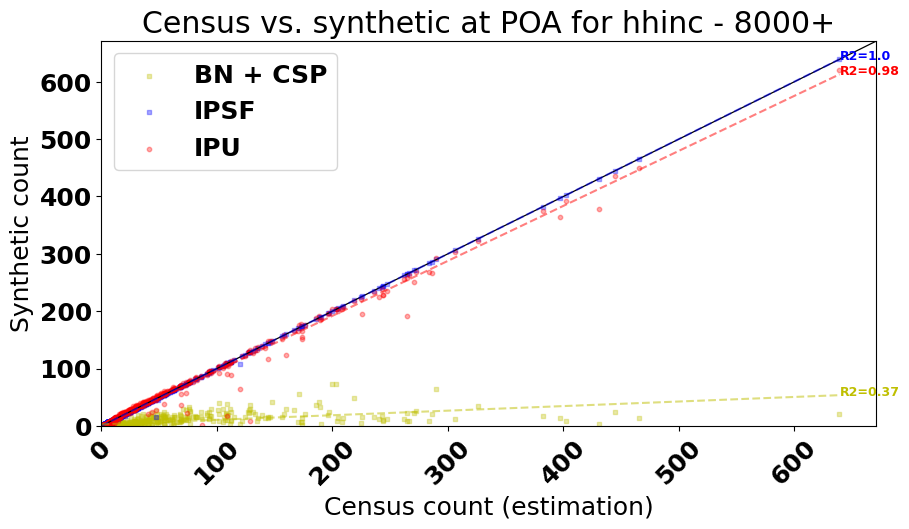

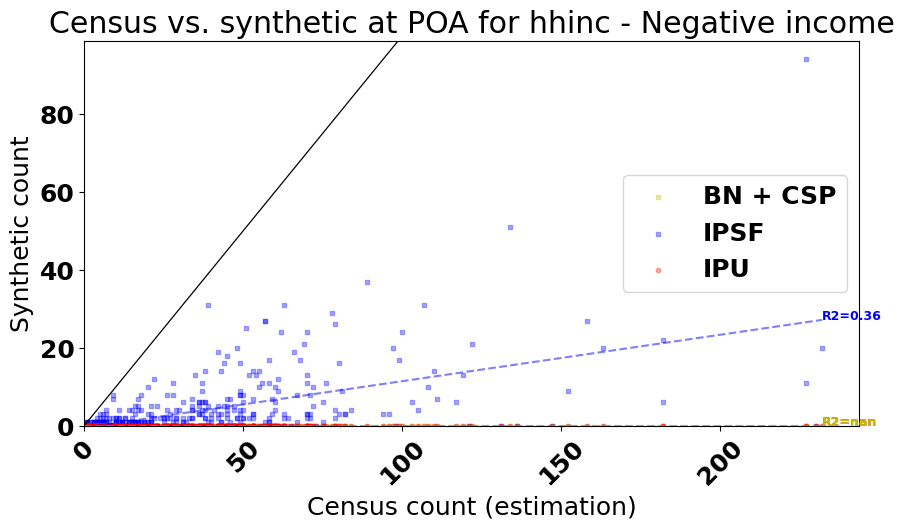

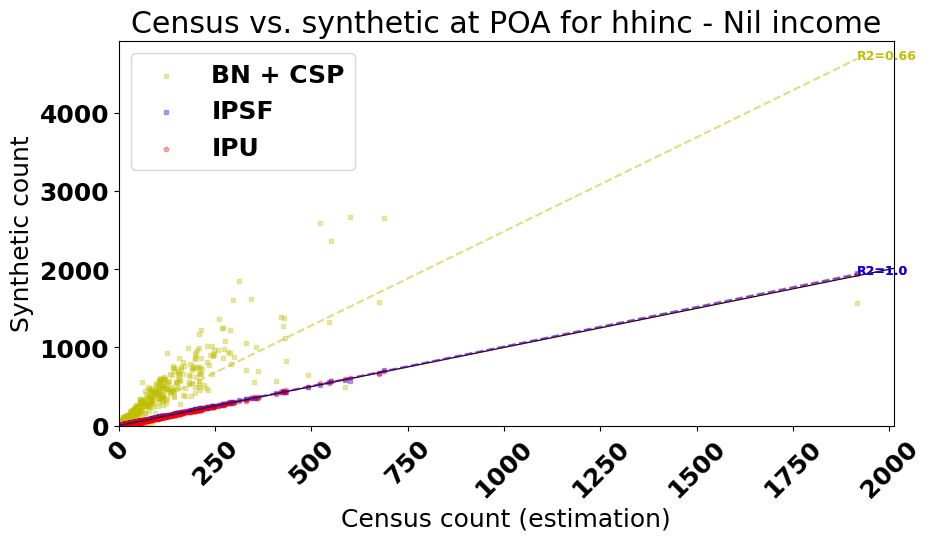

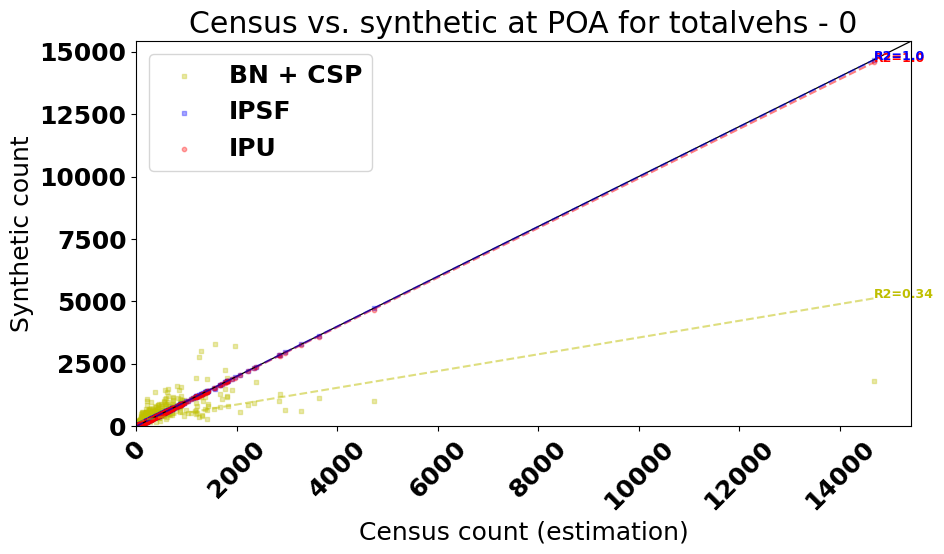

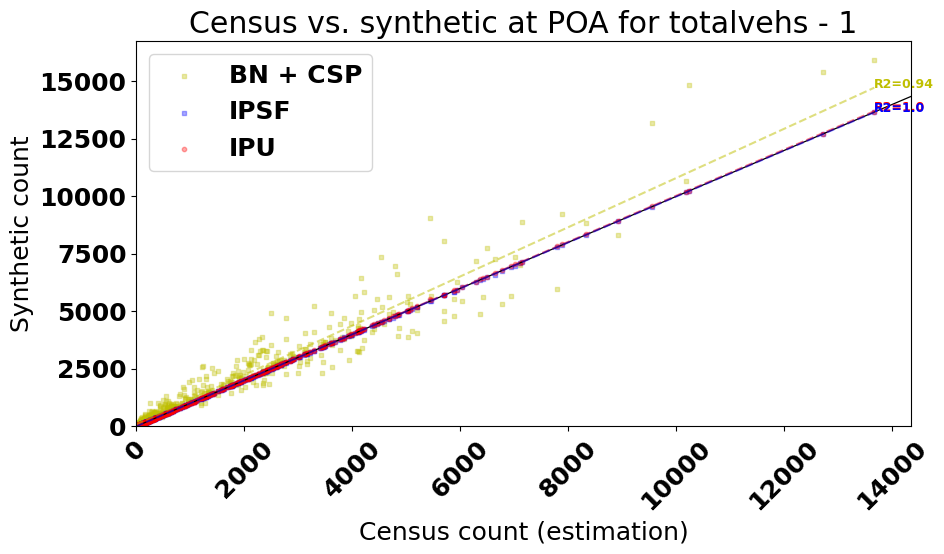

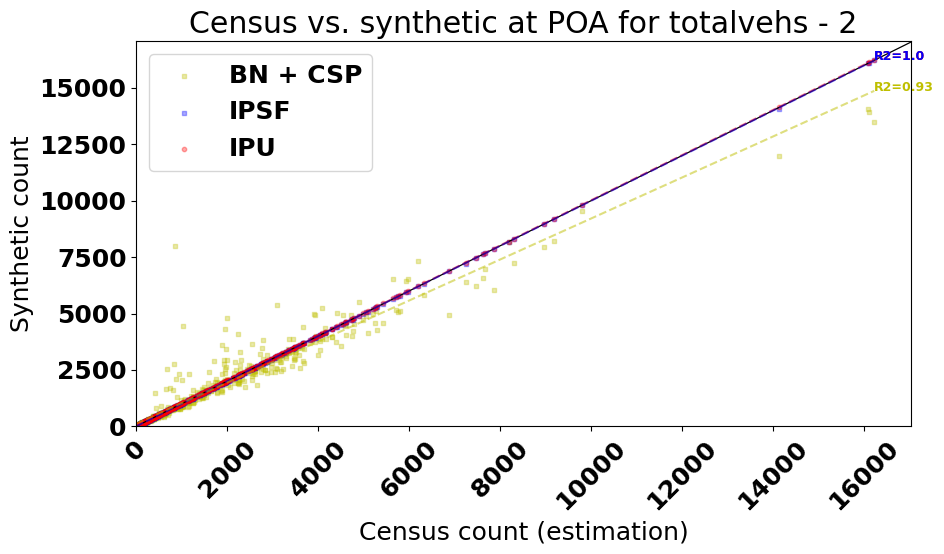

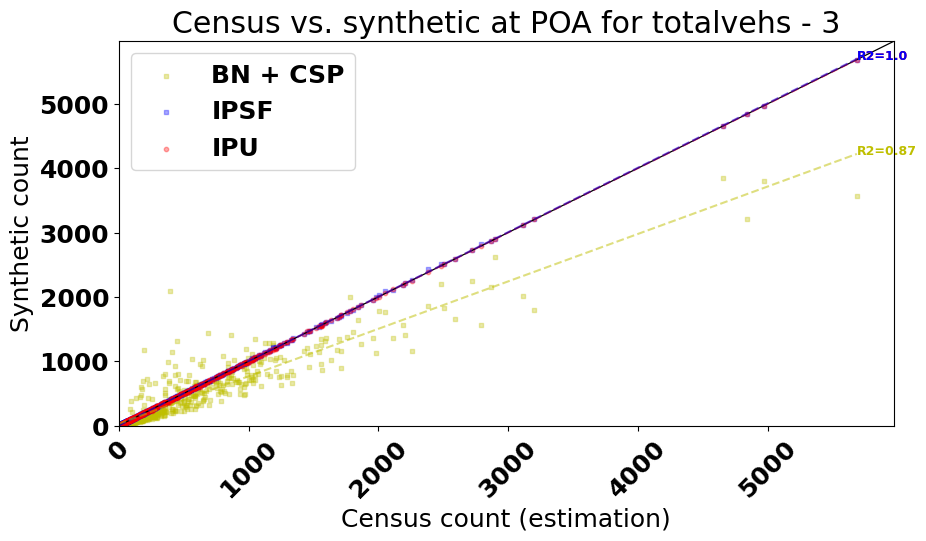

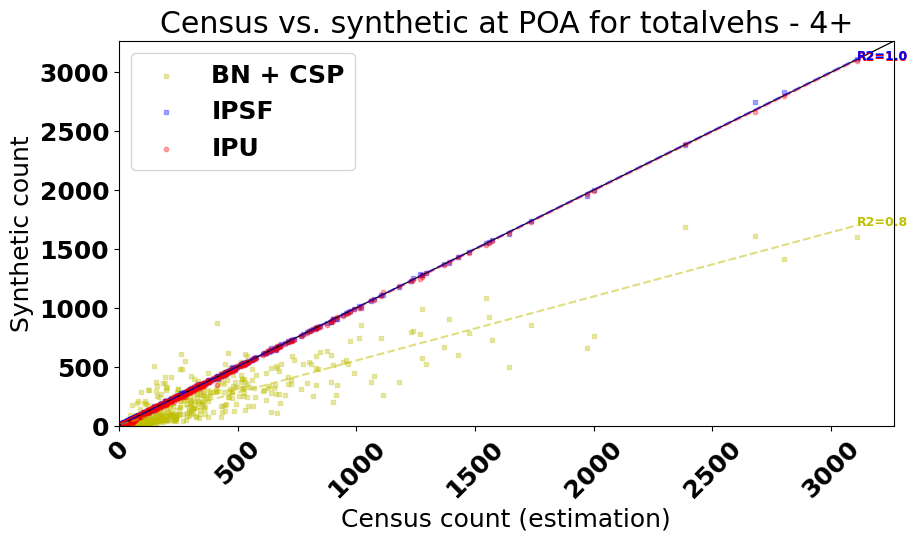

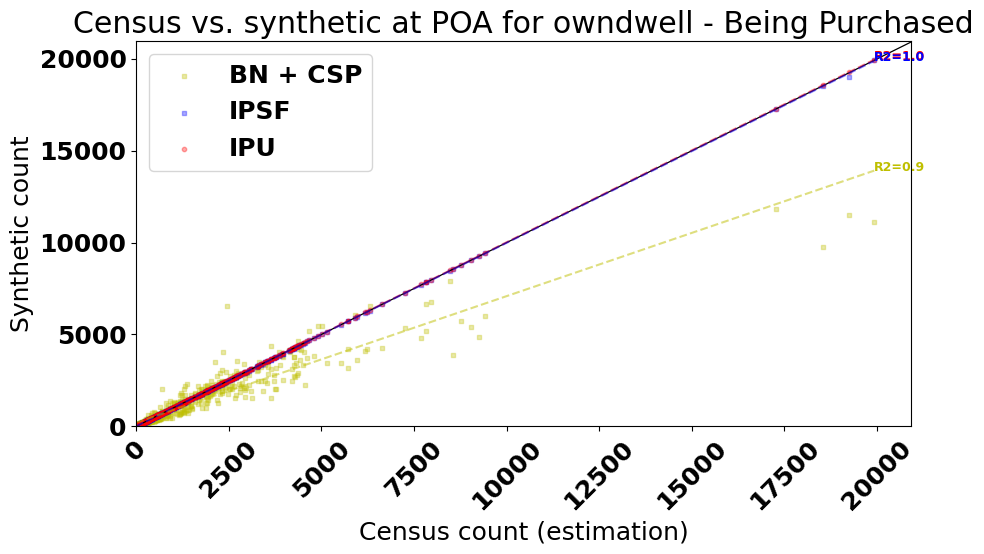

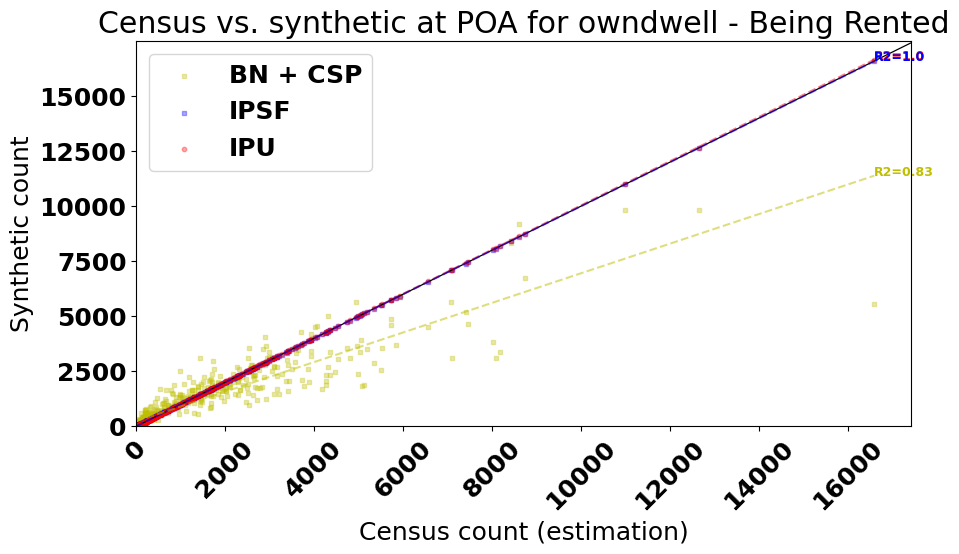

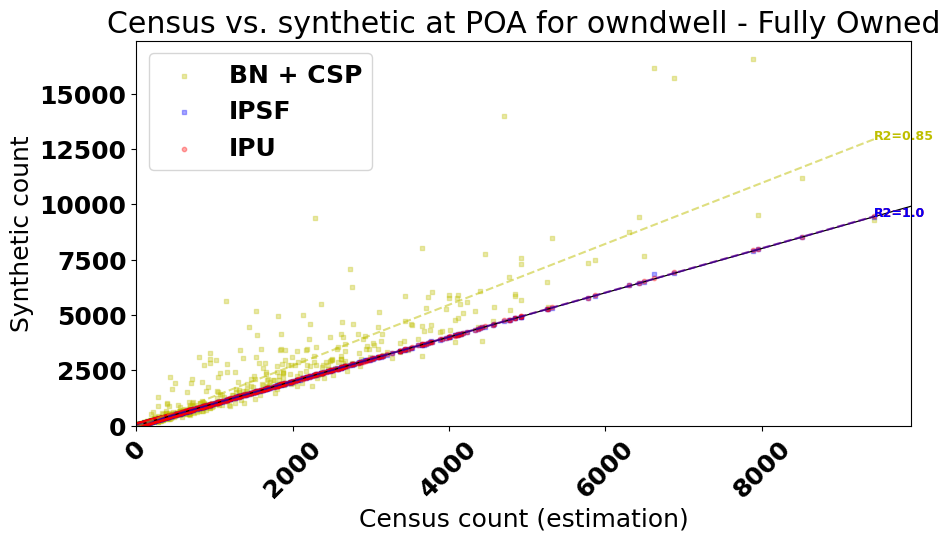

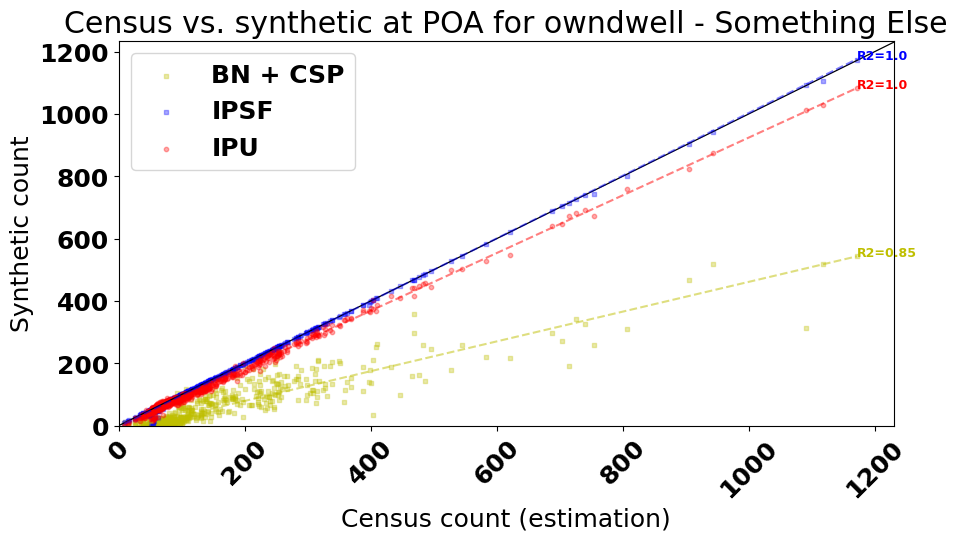

In [11]:
ls_atts = marg_hh.columns.get_level_values(0).unique()
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    syn_check_bn = syn_hh_bn.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_noad = syn_hh_noad.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_ipu = syn_hh_ipu.groupby(chosen_att)["geog"].value_counts()
    att_df = marg_hh[marg_hh.columns[marg_hh.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            if (val, poa) in syn_check_ipu.index:
                to_plot[val][1].append(syn_check_ipu[(val, poa)])
            else:
                to_plot[val][1].append(0)
            if (val, poa) in syn_check_bn.index:
                to_plot[val][2].append(syn_check_bn[(val, poa)])
            else:
                to_plot[val][2].append(0)
            if (val, poa) in syn_check_noad.index:
                to_plot[val][3].append(syn_check_noad[(val, poa)])
            else:
                to_plot[val][3].append(0)


    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0]),
        y_ipu = list(to_plot[val][1])
        y_bn = list(to_plot[val][2])
        y_noad = list(to_plot[val][3])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        # Scatter data
        ax1.scatter(x, y_noad, s=10, c='y', marker="s", label='BN + CSP', alpha=0.33)
        ax1.scatter(x, y_bn, s=10, c='b', marker="s", label='IPSF', alpha=0.33)
        ax1.scatter(x, y_ipu, s=10, c='r', marker="o", label='IPU', alpha=0.33)

        #add line of best fit to plot
        y_best_fit_ipu = np.poly1d(np.polyfit(x[0], y_ipu, 1))(np.unique(x[0]))
        y_best_fit_bn = np.poly1d(np.polyfit(x[0], y_bn, 1))(np.unique(x[0]))
        y_best_fit_noad = np.poly1d(np.polyfit(x[0], y_noad, 1))(np.unique(x[0]))
        ax1.plot(np.unique(x[0]), y_best_fit_ipu, c='r', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_bn, c='b', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_noad, c='y', alpha=0.5, linestyle="--")

        # Cal R squared
        r_s_ipu = r_squared(x[0], y_ipu, 1)["determination"]
        r_s_bn = r_squared(x[0], y_bn, 1)["determination"]
        r_s_noad = r_squared(x[0], y_noad, 1)["determination"]

        ax1.text(max(x[0]), max(y_best_fit_ipu), f"R2={round(r_s_ipu, 2)}", size=9, c="r")
        ax1.text(max(x[0]), max(y_best_fit_bn), f"R2={round(r_s_bn, 2)}", size=9, c="b")
        ax1.text(max(x[0]), max(y_best_fit_noad), f"R2={round(r_s_noad, 2)}", size=9, c="y")
        
        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        val = val.replace("/", "-")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        # plt.show()
        plt.savefig(f'./output/imgs/{chosen_att}_{val}_census_compa.png')

In [11]:
# dict_id_poa = dict(zip(syn_hh_bn["hhid"], syn_hh_bn["POA"]))
# syn_pp_bn["POA"] = syn_pp_bn.apply(lambda r: dict_id_poa[r["hhid"]], axis=1)

# dict_id_poa_no = dict(zip(syn_hh_noad["hhid"], syn_hh_noad["POA"]))
# syn_pp_noad["POA"] = syn_pp_noad.apply(lambda r: dict_id_poa_no[r["hhid"]], axis=1)

In [12]:
syn_pp_noad

hhid    age sex          persinc     nolicence anywork   POA  \
0              1  50-59   M  $1000-1249 p.w.    No Licence       Y  3000   
1         136278  60-69   F    $400-599 p.w.  Some Licence       N  3000   
2         202879  20-29   F  $1000-1249 p.w.    No Licence       Y  3000   
3         213994  70-79   F    $400-599 p.w.    No Licence       N  3000   
4         361238  60-69   F    $400-599 p.w.    No Licence       N  3000   
...          ...    ...  ..              ...           ...     ...   ...   
5858204  2431957  60-69   M    $200-299 p.w.  Some Licence       Y  3931   
5858205  2425081  80-89   F      Zero Income    No Licence       N  3174   
5858206  2426661  50-59   M  $1250-1499 p.w.  Some Licence       Y  3043   
5858207  2423327  70-79   M    $400-599 p.w.    No Licence       N  3152   
5858208  2425350  70-79   F      Zero Income  Some Licence       N  3217   

        relationship  
0               Main  
1               Main  
2               Main  
3               Main  
4               Main  
...              ...  
5858204       Others  
5858205       Others  
5858206       Others  
5858207       Others  
5858208       Others  

[5858209 rows x 8 columns]

C:\Users\dlaa0001\AppData\Local\Temp\ipykernel_12408\3307533940.py:36: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize = (10, 5))


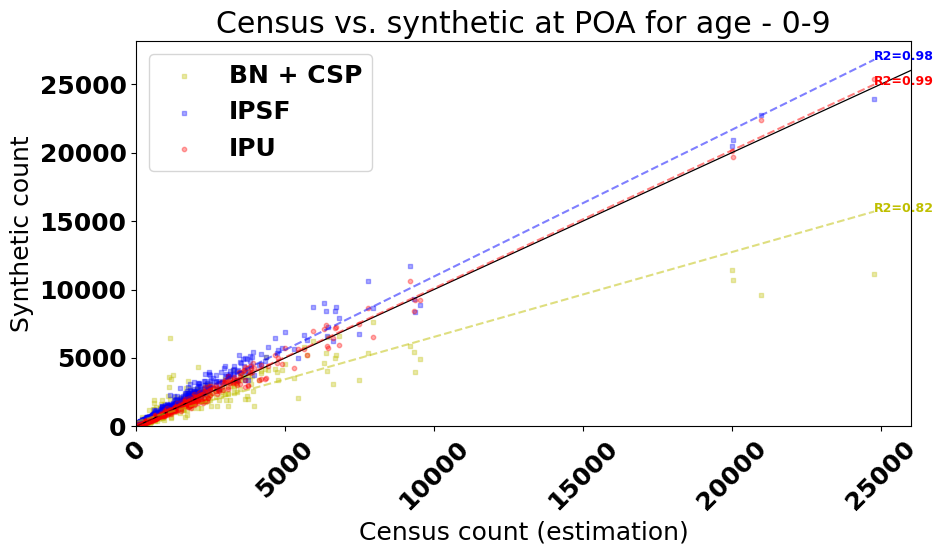

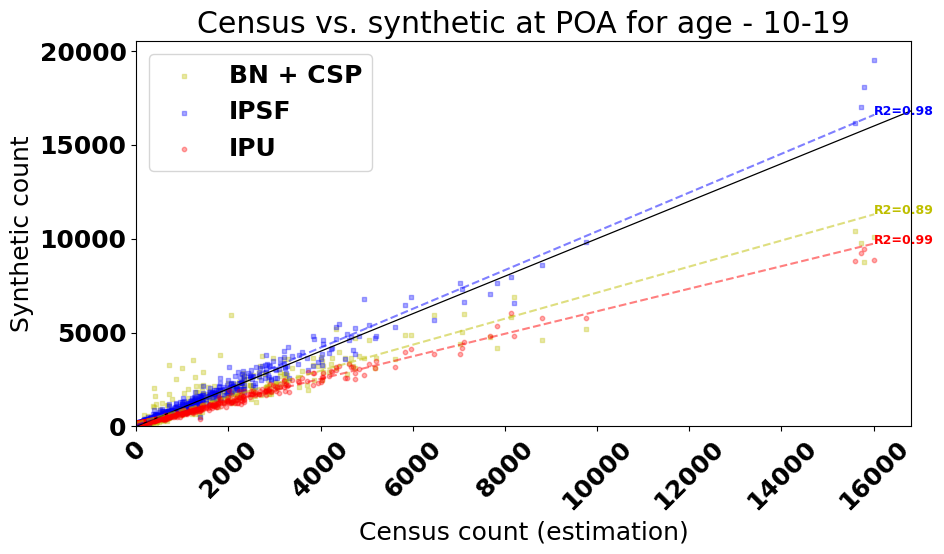

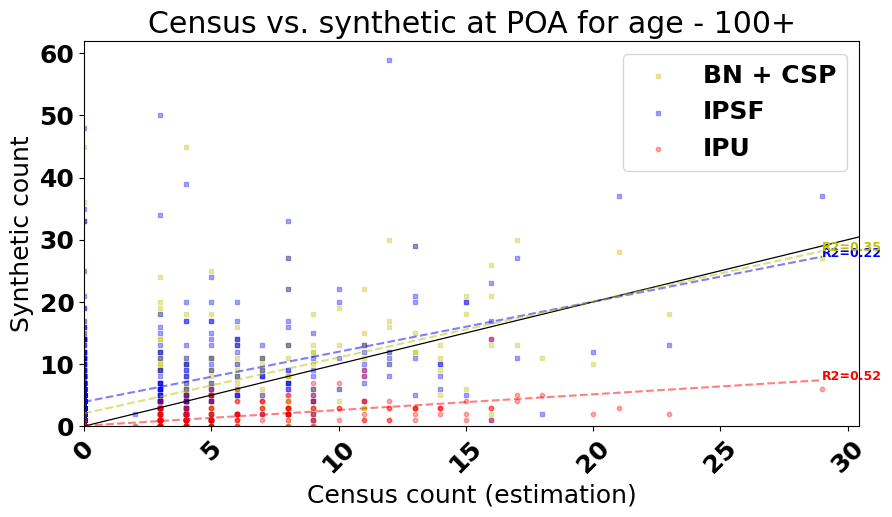

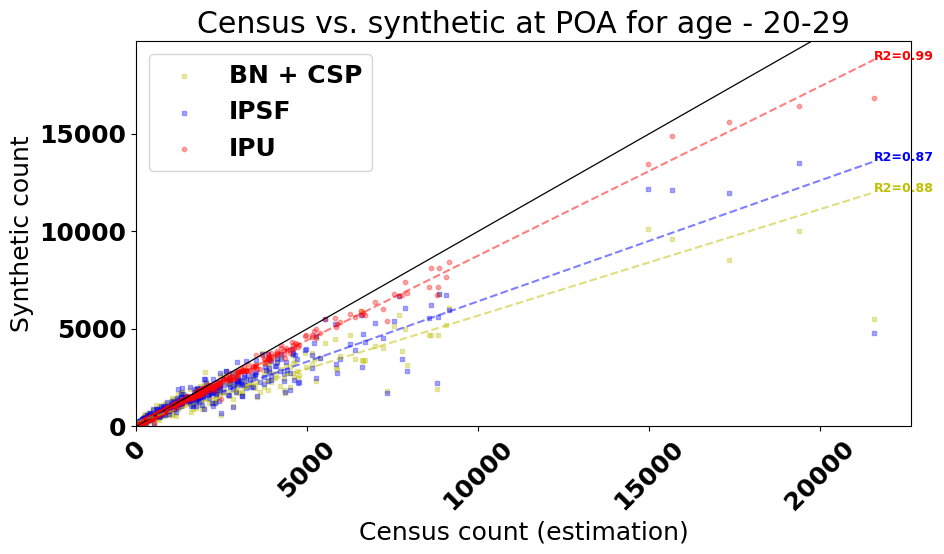

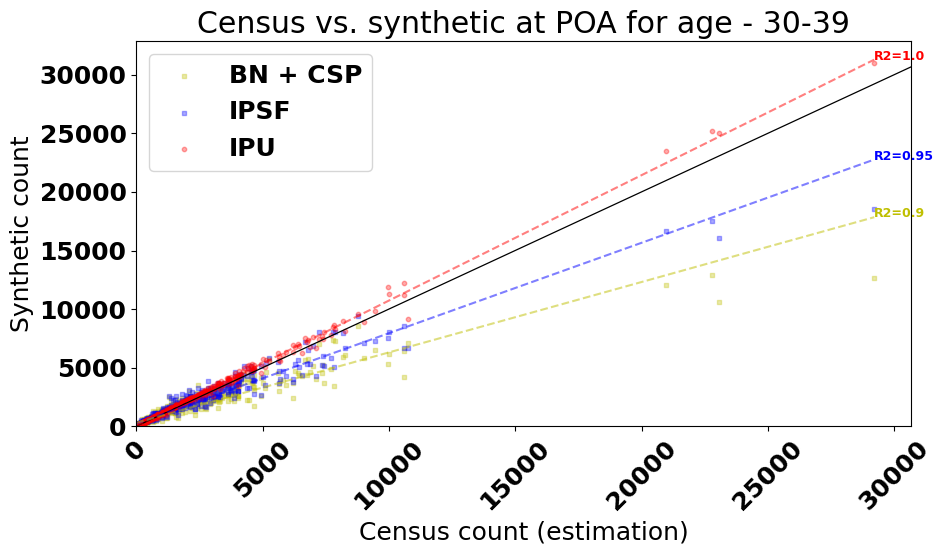

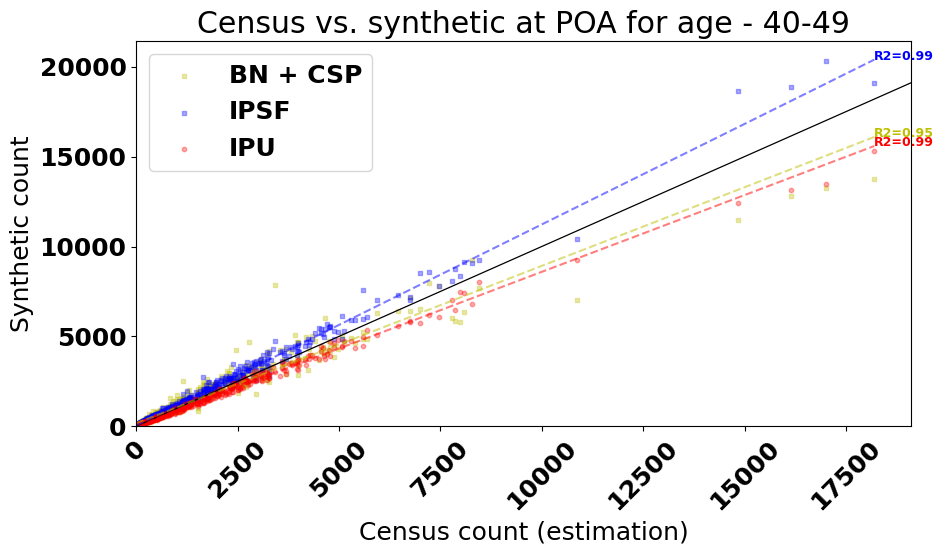

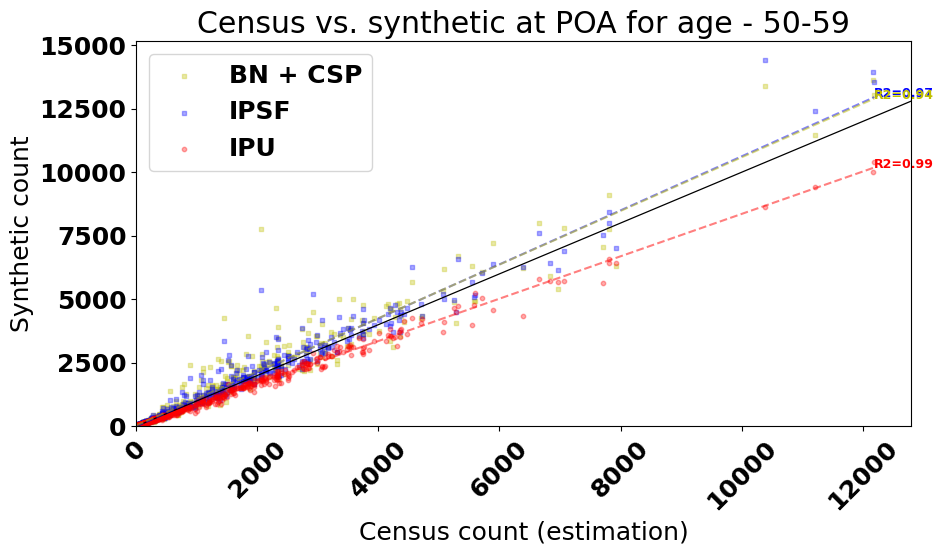

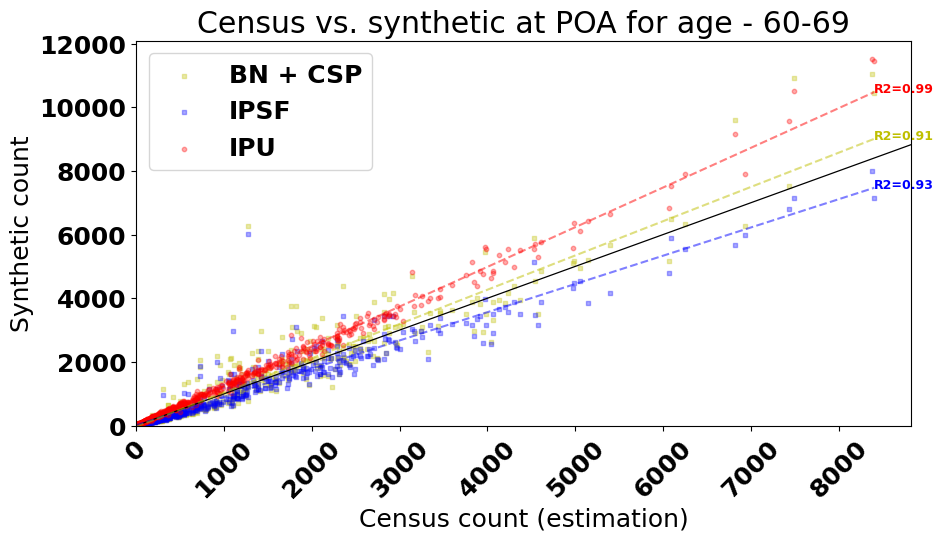

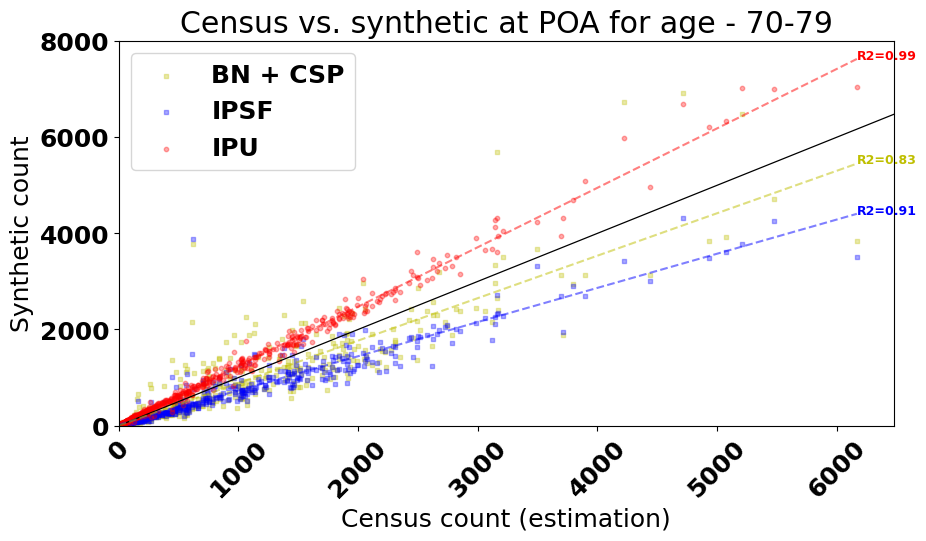

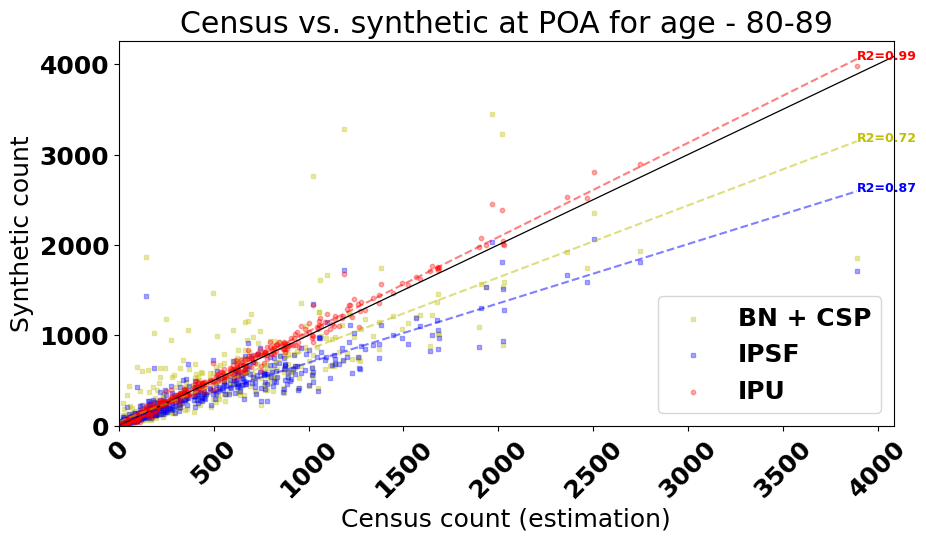

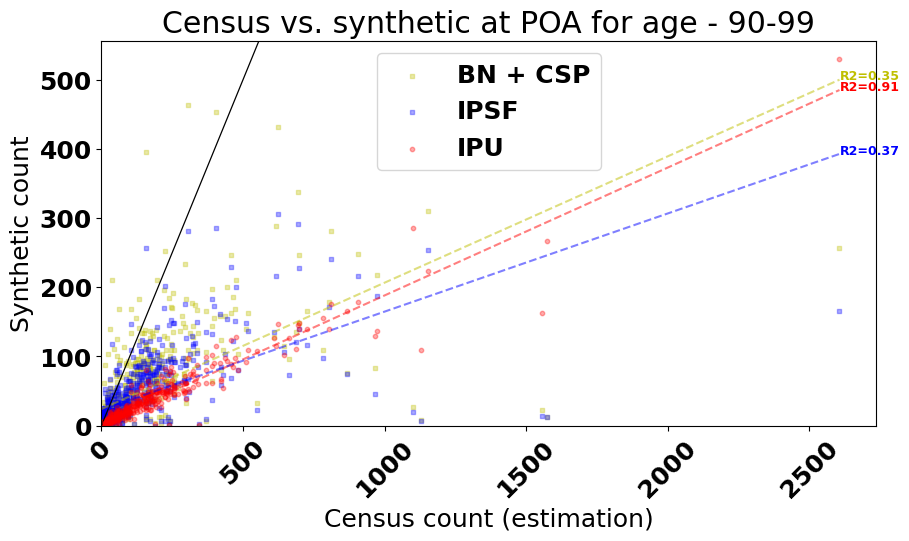

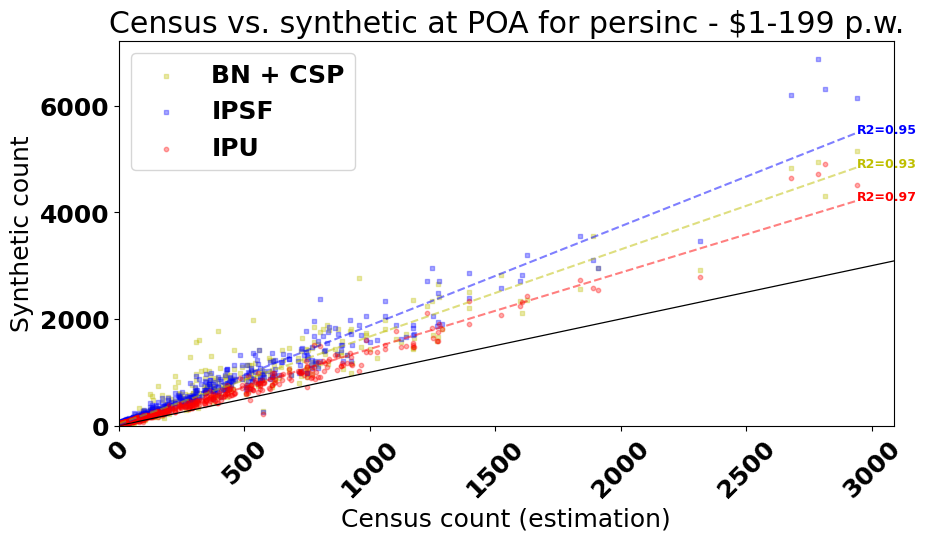

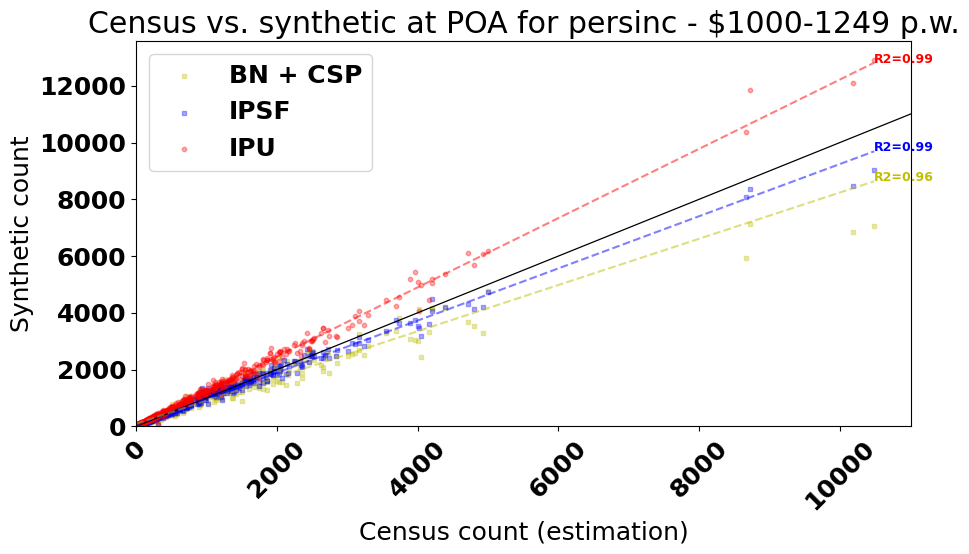

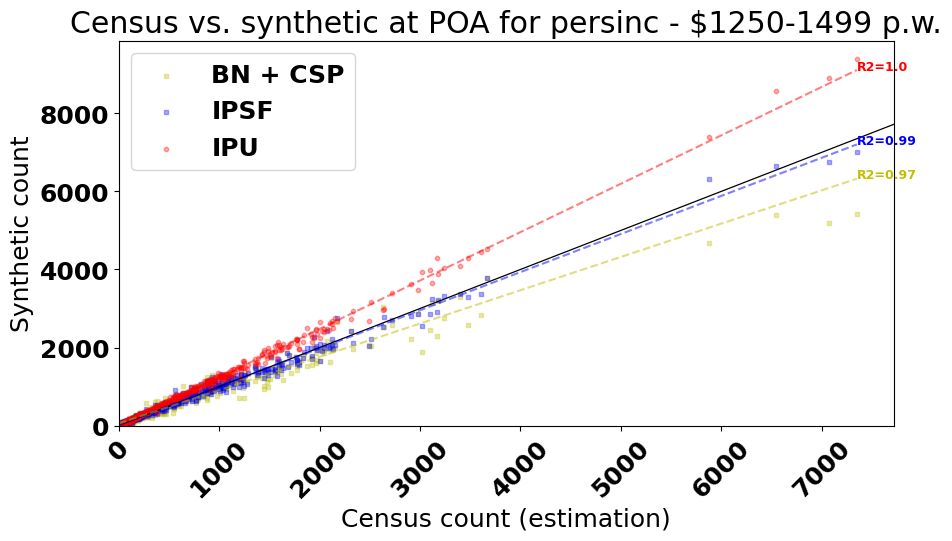

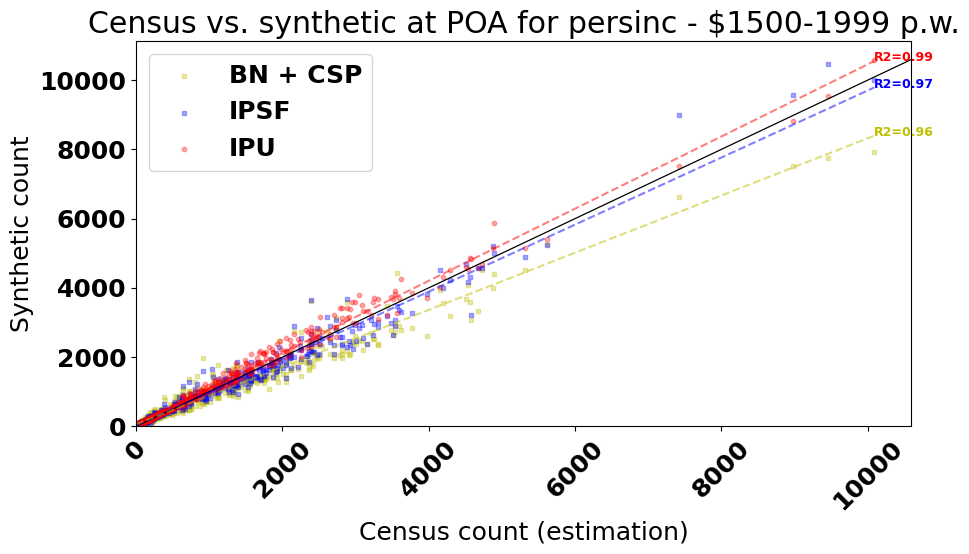

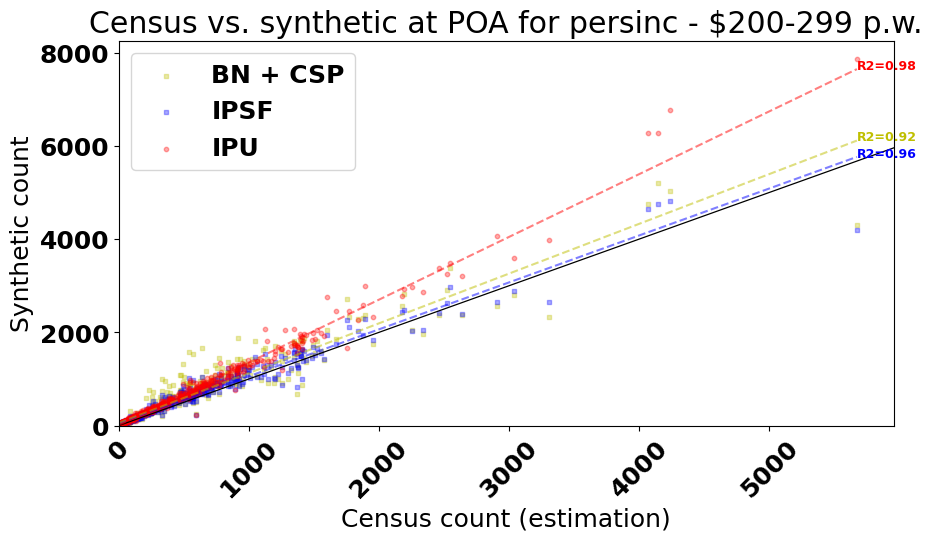

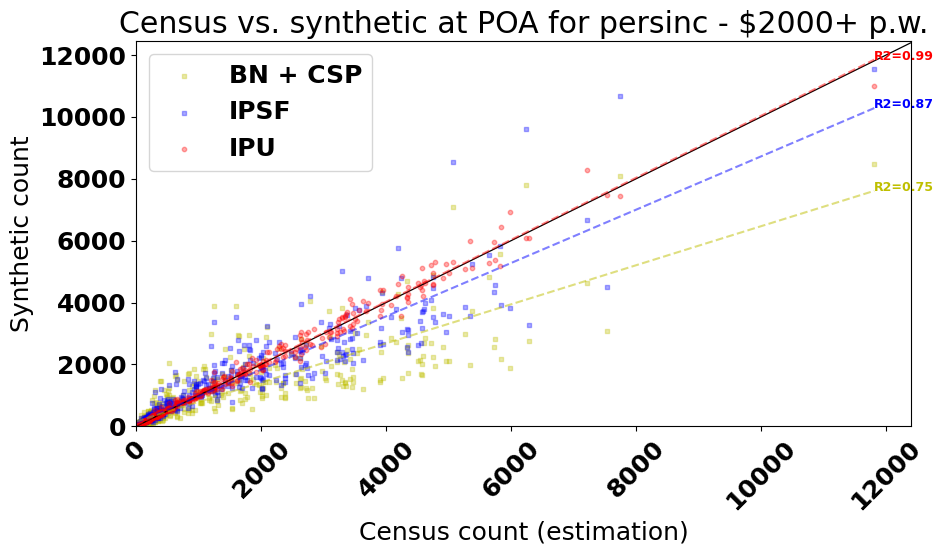

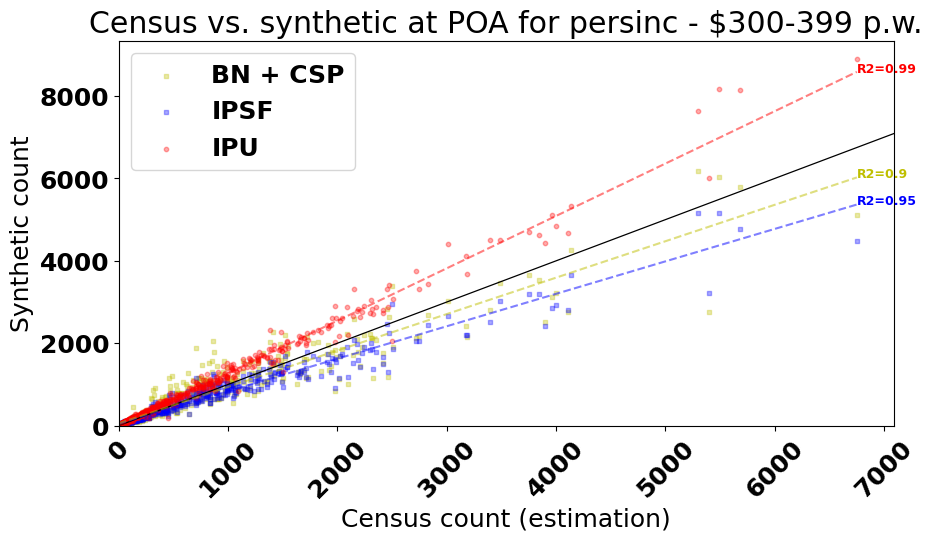

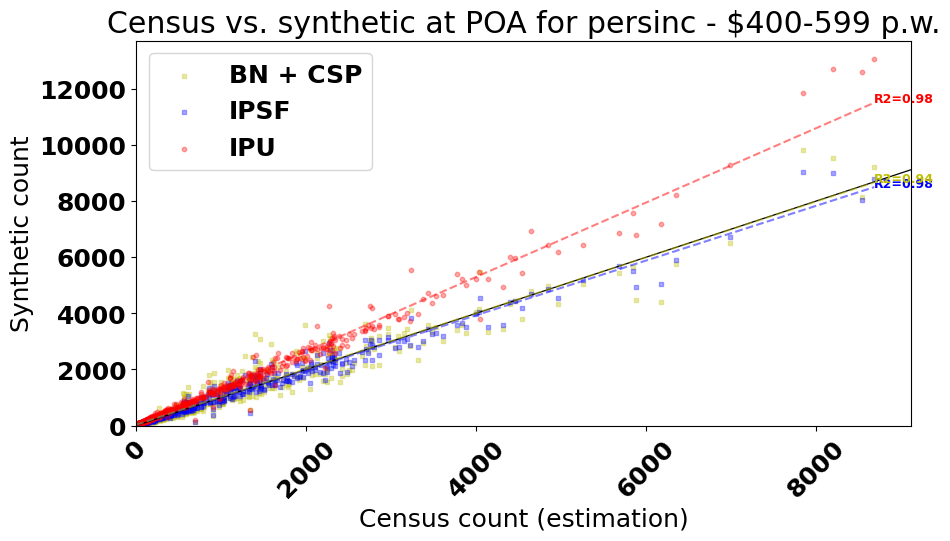

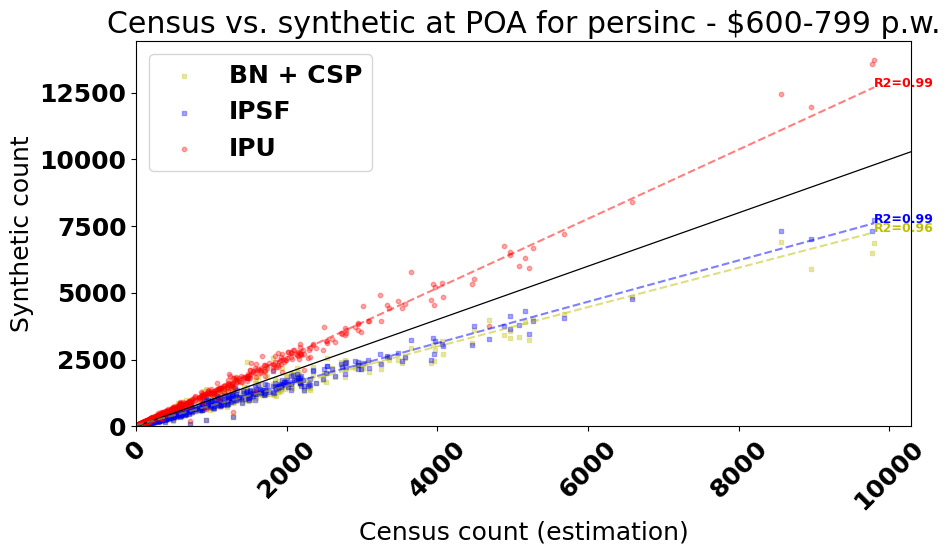

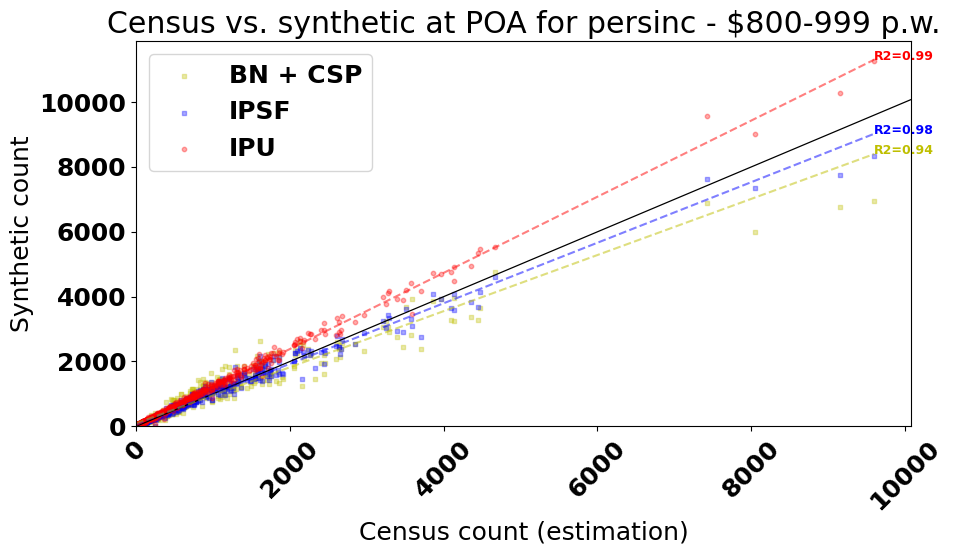

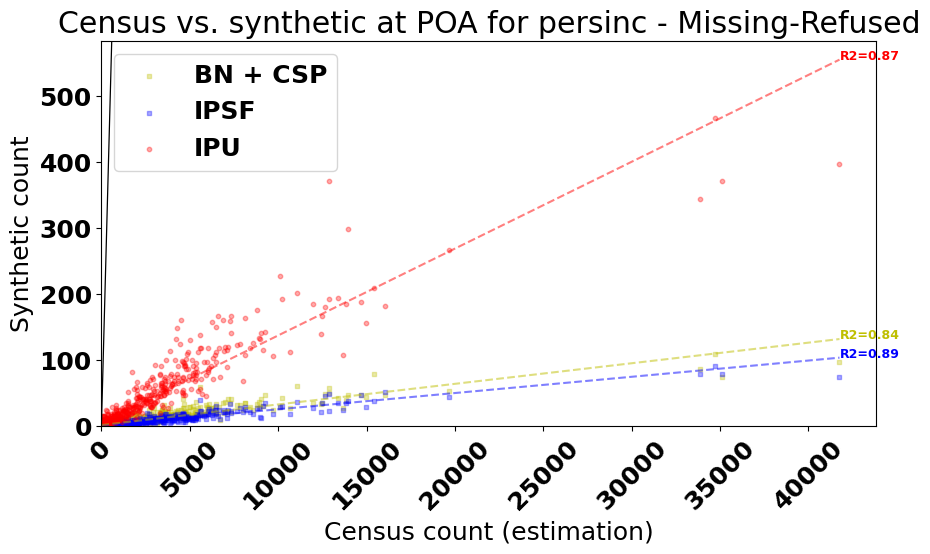

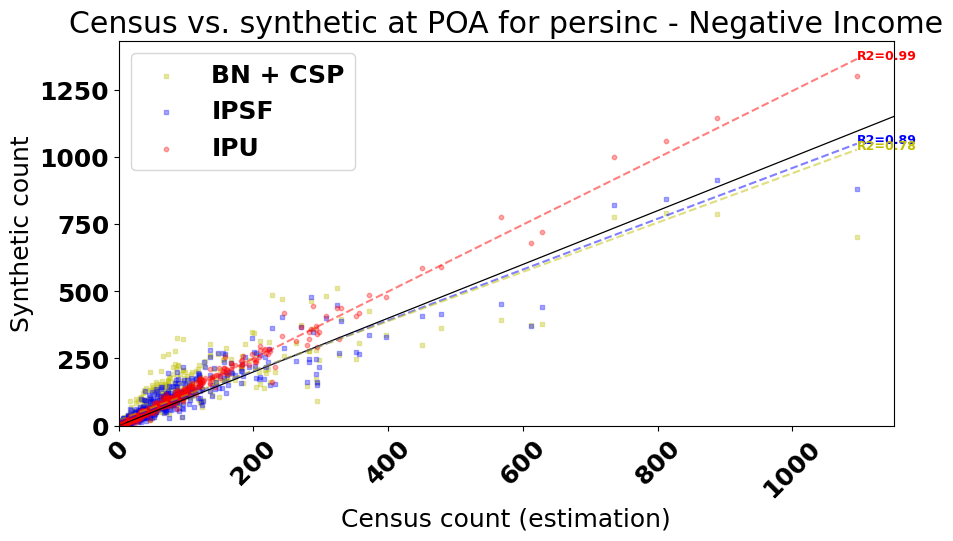

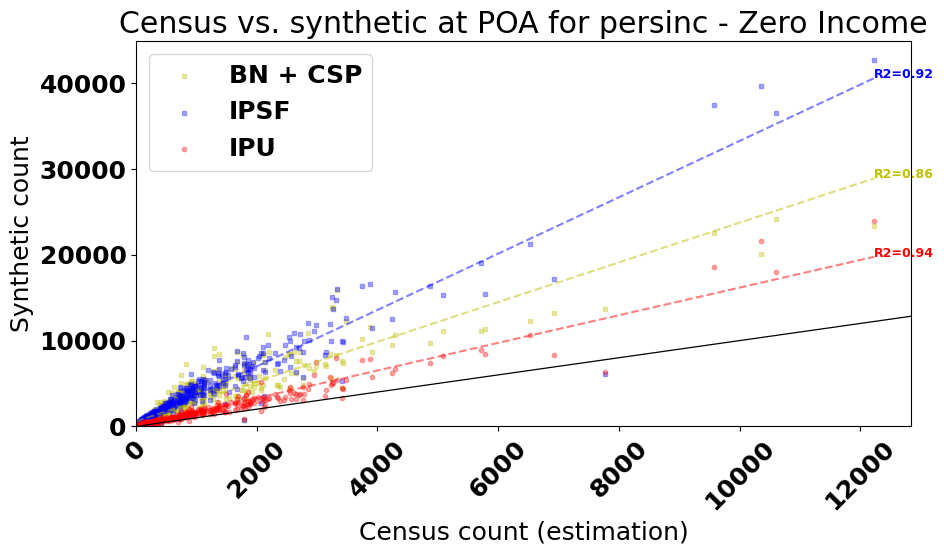

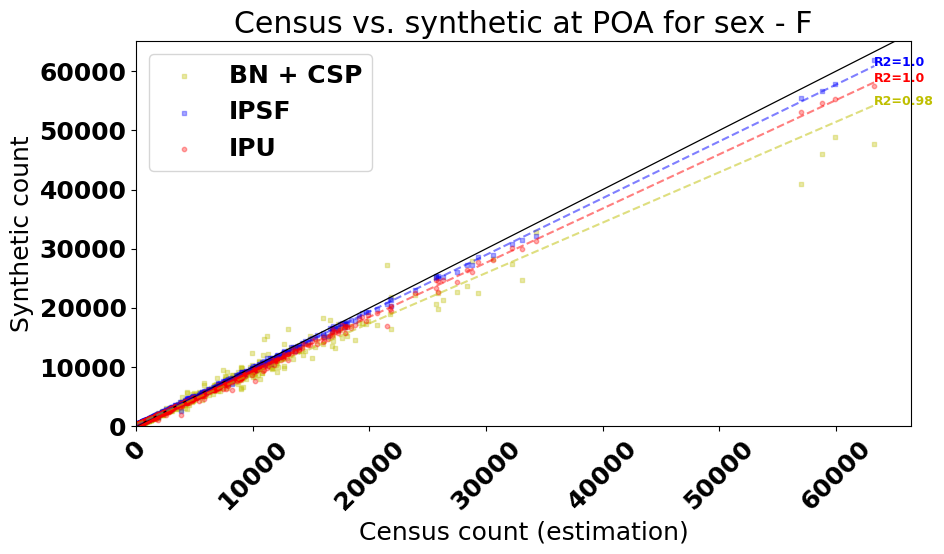

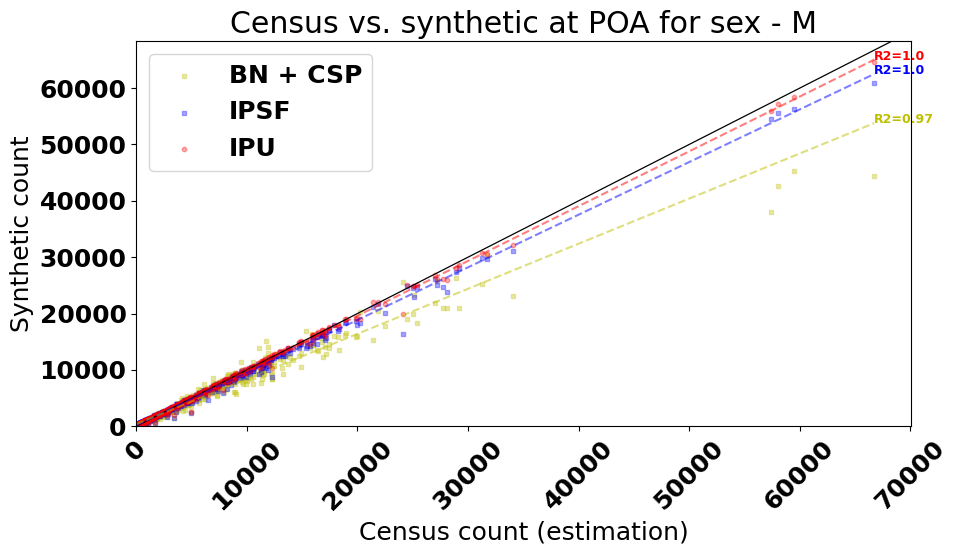

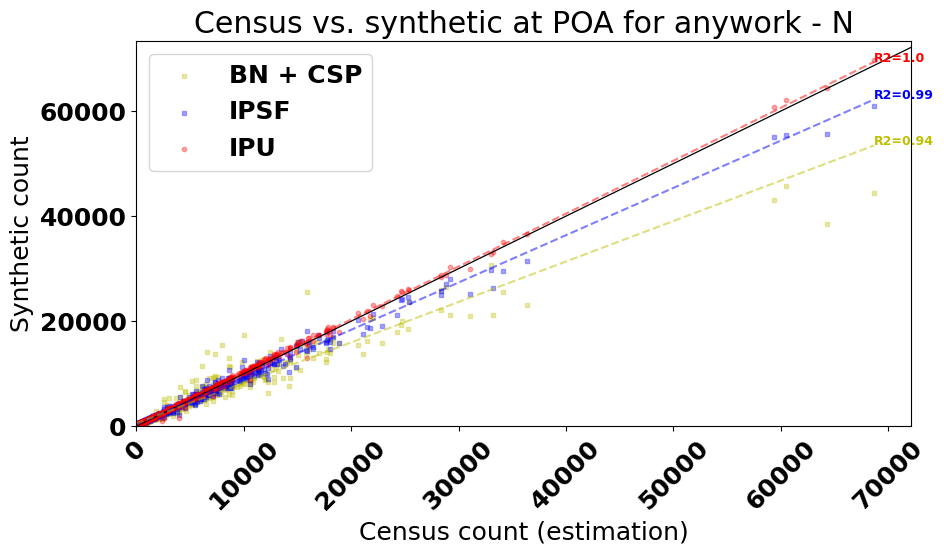

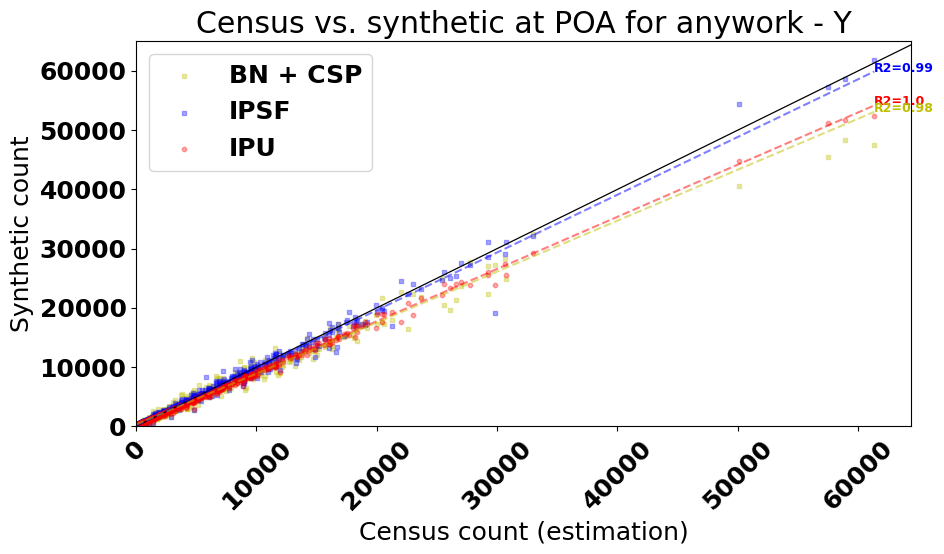

In [13]:
ls_atts = marg_pp.columns.get_level_values(0).unique()
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    syn_check_bn = syn_pp_bn.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_noad = syn_pp_noad.groupby(chosen_att)[geo_lev].value_counts()
    syn_check_ipu = syn_pp_ipu.groupby(chosen_att)["geog"].value_counts()
    att_df = marg_pp[marg_pp.columns[marg_pp.columns.get_level_values(0)==chosen_att]]
    att_df.index = att_df.index.astype(str)

    to_plot = {}
    for val in att_df.columns.get_level_values(1).unique():
        to_plot[val] = [[], [], [], []]
        for poa in att_df.index:
            to_plot[val][0].append(att_df.loc[poa][(chosen_att ,val)])
            if (val, poa) in syn_check_ipu.index:
                to_plot[val][1].append(syn_check_ipu[(val, poa)])
            else:
                to_plot[val][1].append(0)
            if (val, poa) in syn_check_bn.index:
                to_plot[val][2].append(syn_check_bn[(val, poa)])
            else:
                to_plot[val][2].append(0)
            if (val, poa) in syn_check_noad.index:
                to_plot[val][3].append(syn_check_noad[(val, poa)])
            else:
                to_plot[val][3].append(0)


    for val in att_df.columns.get_level_values(1):
        x = list(to_plot[val][0]),
        y_ipu = list(to_plot[val][1])
        y_bn = list(to_plot[val][2])
        y_noad = list(to_plot[val][3])

        fig = plt.figure(figsize = (10, 5))
        ax1 = fig.add_subplot(111)
        ax1.axline((0, 0), slope=1, c="black", linewidth=0.9)

        # Scatter data
        ax1.scatter(x, y_noad, s=10, c='y', marker="s", label='BN + CSP', alpha=0.33)
        ax1.scatter(x, y_bn, s=10, c='b', marker="s", label='IPSF', alpha=0.33)
        ax1.scatter(x, y_ipu, s=10, c='r', marker="o", label='IPU', alpha=0.33)

        #add line of best fit to plot
        y_best_fit_ipu = np.poly1d(np.polyfit(x[0], y_ipu, 1))(np.unique(x[0]))
        y_best_fit_bn = np.poly1d(np.polyfit(x[0], y_bn, 1))(np.unique(x[0]))
        y_best_fit_noad = np.poly1d(np.polyfit(x[0], y_noad, 1))(np.unique(x[0]))
        ax1.plot(np.unique(x[0]), y_best_fit_ipu, c='r', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_bn, c='b', alpha=0.5, linestyle="--")
        ax1.plot(np.unique(x[0]), y_best_fit_noad, c='y', alpha=0.5, linestyle="--")

        # Cal R squared
        r_s_ipu = r_squared(x[0], y_ipu, 1)["determination"]
        r_s_bn = r_squared(x[0], y_bn, 1)["determination"]
        r_s_noad = r_squared(x[0], y_noad, 1)["determination"]

        ax1.text(max(x[0]), max(y_best_fit_ipu), f"R2={round(r_s_ipu, 2)}", size=9, c="r")
        ax1.text(max(x[0]), max(y_best_fit_bn), f"R2={round(r_s_bn, 2)}", size=9, c="b")
        ax1.text(max(x[0]), max(y_best_fit_noad), f"R2={round(r_s_noad, 2)}", size=9, c="y")
        
        plt.xlabel(f"Census count (estimation)")
        plt.ylabel("Synthetic count")
        val = val.replace("/", "-")
        plt.title(f"Census vs. synthetic at {geo_lev} for {chosen_att} - {val}")
        ax1.set_xlim(left=0)
        ax1.set_ylim(bottom=0)
        plt.xticks(rotation=45)
        plt.legend()
        # plt.show()
        plt.savefig(f'./output/imgs/{chosen_att}_{val}_census_compa.png')

In [10]:
syn_hh_ipu = syn_hh_ipu.rename(columns={"geog": geo_lev})

In [11]:
ls_atts = marg_hh.columns.get_level_values(0).unique()
ls_zones = marg_hh.index
converted_census_m = marg_hh.drop(columns=list(marg_hh.columns[marg_hh.columns.get_level_values(0).isin(["sample_geog", "zone_id"])]))
converted_census_m.index = converted_census_m.index.astype(str)

converted_bn_m = convert_full_to_marg_count(syn_hh_bn, geo_lev, [x for x in syn_hh_bn if x not in ls_atts])
converted_noad_m = convert_full_to_marg_count(syn_hh_noad, geo_lev, [x for x in syn_hh_noad if x not in ls_atts])
converted_ipu_m = convert_full_to_marg_count(syn_hh_ipu, geo_lev, [x for x in syn_hh_ipu if x not in ls_atts])

In [12]:
diff_bn_m = (converted_bn_m - converted_census_m)**2
diff_noad_m = (converted_noad_m - converted_census_m)**2
diff_ipu_m = (converted_ipu_m - converted_census_m)**2

In [23]:
poa_geo = gpd.read_file(os.path.join(data_dir,f"POA_2021_AUST_GDA2020_SHP.zip"), columns=["POA_CODE21"], engine="pyogrio")
poa_geo[geo_lev] = poa_geo["POA_CODE21"].astype(str)
poa_geo = poa_geo.set_index(geo_lev)
poa_geo

POA_CODE21                                           geometry
POA                                                               
0800       0800  POLYGON ((130.83681 -12.45376, 130.83684 -12.4...
0810       0810  POLYGON ((130.89986 -12.36567, 130.89875 -12.3...
0812       0812  POLYGON ((130.91915 -12.40786, 130.91831 -12.4...
0820       0820  POLYGON ((130.85260 -12.43994, 130.85089 -12.4...
0822       0822  MULTIPOLYGON (((136.56648 -12.08392, 136.56704...
...         ...                                                ...
7469       7469  MULTIPOLYGON (((144.79215 -41.46478, 144.79212...
7470       7470  POLYGON ((145.57769 -41.78640, 145.57686 -41.7...
9494       9494                                               None
9797       9797                                               None
ZZZZ       ZZZZ                                               None

[2644 rows x 2 columns]

In [25]:
# Process by zones
zones_bn = diff_bn_m.sum(axis=1) / len(ls_zones)
zones_bn.name = "IPSF"
zones_ipu = diff_ipu_m.sum(axis=1) / len(ls_zones)
zones_ipu.name = "IPU"
zones_noad = diff_noad_m.sum(axis=1) / len(ls_zones)
zones_noad.name = "BN_CSP"

fin_poa_rmse = poa_geo.merge(zones_bn, left_index=True, right_index=True)
fin_poa_rmse = fin_poa_rmse.merge(zones_ipu, left_index=True, right_index=True)
fin_poa_rmse = fin_poa_rmse.merge(zones_noad, left_index=True, right_index=True)

In [36]:
font = {'weight' : 'bold',
        'size'   : 10}
plt.rc('font', **font)

In [61]:
ls_metro_mel_raw = [
    (3000, 3211),
    (3335, 3336),
    (3338, 3338),
    (3427, 3429),
    (3750, 3752),
    (3754, 3755),
    (3759, 3761),
    (3765, 3775),
    (3781, 3787),
    (3788, 3815),
    (3910, 3920),
    (3926, 3944),
    (3975, 3978),
    (3980, 3980)
]
ls_metro_poa_all = []
for pair_range in ls_metro_mel_raw:
    ls_metro_poa_all += list(range(pair_range[0], pair_range[1]+1))

In [63]:
metro_results = fin_poa_rmse[fin_poa_rmse.index.isin([str(x) for x in ls_metro_poa_all])]
metro_results

Empty GeoDataFrame
Columns: [POA_CODE21, geometry, IPSF, IPU, BN_CSP]
Index: []

<Axes: >

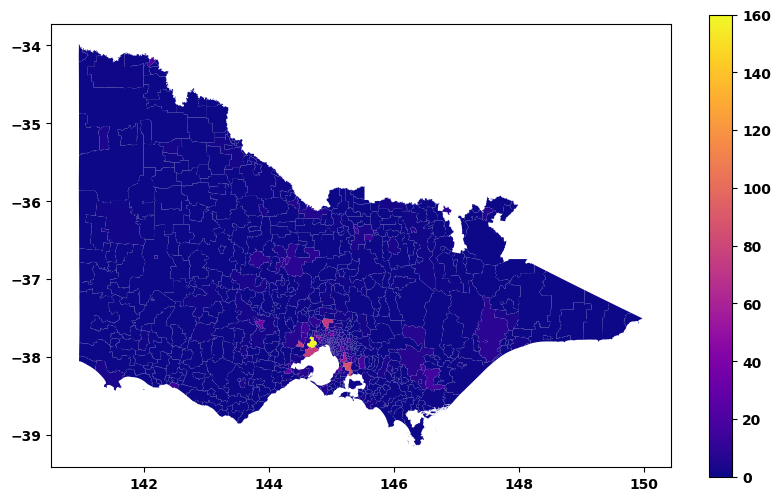

In [55]:
fin_poa_rmse.plot(column="IPSF", legend=True, figsize=(10, 6), vmin=0, vmax=160, cmap="plasma")

<Axes: >

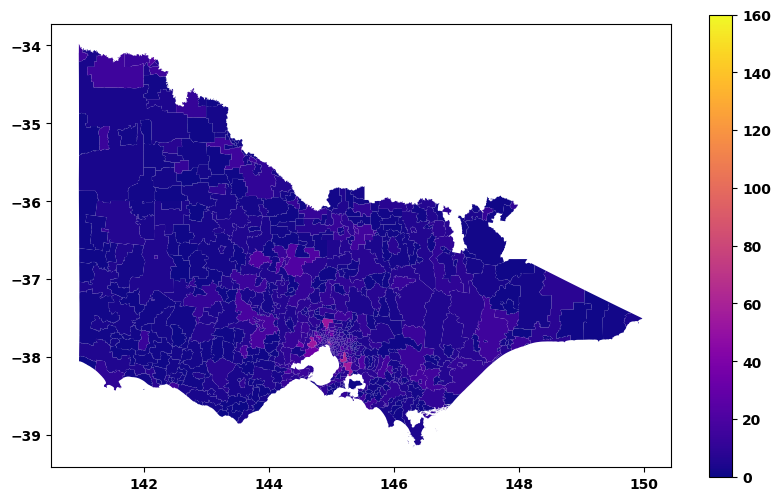

In [56]:
fin_poa_rmse.plot(column="IPU", legend=True, figsize=(10, 6), vmin=0, vmax=160, cmap="plasma")

<Axes: >

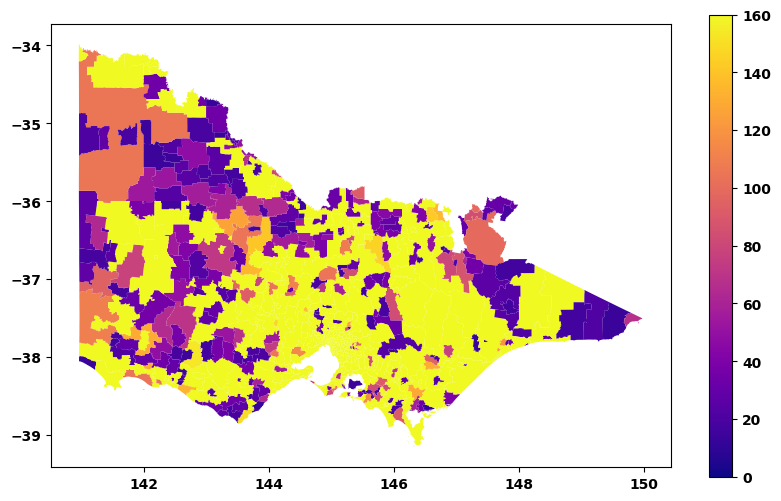

In [57]:
fin_poa_rmse.plot(column="BN_CSP", legend=True, figsize=(10, 6), vmin=0, vmax=160, cmap="plasma")

In [23]:
hh_atts_df["BN_CSP_to_IPU"] = (hh_atts_df["BN_CSP"] - hh_atts_df["IPU"])/hh_atts_df["IPU"]
hh_atts_df["IPSF_to_IPU"] = (hh_atts_df["IPSF"] - hh_atts_df["IPU"])/hh_atts_df["IPU"]
hh_atts_df["IPSF_to_BN_CSP"] = (hh_atts_df["IPSF"] - hh_atts_df["BN_CSP"])/hh_atts_df["BN_CSP"]

hh_states_df["BN_CSP_to_IPU"] = (hh_states_df["BN_CSP"] - hh_states_df["IPU"])/hh_states_df["IPU"]
hh_states_df["IPSF_to_IPU"] = (hh_states_df["IPSF"] - hh_states_df["IPU"])/hh_states_df["IPU"]
hh_states_df["IPSF_to_BN_CSP"] = (hh_states_df["IPSF"] - hh_states_df["BN_CSP"])/hh_states_df["BN_CSP"]

In [24]:
hh_atts_df

IPU     BN_CSP      IPSF  BN_CSP_to_IPU  IPSF_to_IPU  \
hhsize     0.972260  14.724183  0.000000      14.144291    -1.000000   
dwelltype  1.391279  38.937256  0.084818      26.986657    -0.939036   
hhinc      1.222738  16.686541  0.931115      12.646865    -0.238500   
totalvehs  0.747824  17.732860  0.196812      22.712609    -0.736821   
owndwell   0.913182  26.724861  0.256972      28.265649    -0.718597   

           IPSF_to_BN_CSP  
hhsize          -1.000000  
dwelltype       -0.997822  
hhinc           -0.944200  
totalvehs       -0.988901  
owndwell        -0.990385

In [19]:
ls_zones = marg_pp.index
ls_atts = marg_pp.columns.get_level_values(0).unique()

d_df_states = []
d_df_atts = []

name_states = []
name_atts = []
for chosen_att in ls_atts:
    if chosen_att in ["sample_geog", "zone_id"]: 
        continue
    att_df = marg_pp[marg_pp.columns[marg_pp.columns.get_level_values(0)==chosen_att]]

    gb_bn = syn_pp_bn[[geo_lev, chosen_att]].value_counts()
    gb_noad = syn_pp_noad[[geo_lev, chosen_att]].value_counts()
    gb_ipu = syn_pp_ipu[["geog", chosen_att]].value_counts()

    ls_states = att_df.columns.get_level_values(1)
    sum_err_att = np.zeros(3)
    for state in ls_states:
        sum_err_zone = np.zeros(3)
        for zone in ls_zones:
            val_census = marg_pp[(chosen_att, state)][zone]
            val_bn = gb_bn[(str(zone), state)] if (str(zone), state) in gb_bn.index else 0
            val_noad = gb_noad[(str(zone), state)] if (str(zone), state) in gb_noad.index else 0
            val_ipu = gb_ipu[(str(zone), state)] if (str(zone), state) in gb_ipu.index else 0
            ls_deal = np.array([val_ipu, val_noad, val_bn])
            sum_err_zone += (ls_deal - val_census)**2
        state_err = np.sqrt(sum_err_zone / len(ls_zones))
        name_states.append(f"{chosen_att}_{state}")
        d_df_states.append(state_err)
        sum_err_att += state_err
    att_avg_err = sum_err_att / len(ls_zones)
    name_atts.append(chosen_att)
    d_df_atts.append(att_avg_err)

order_cols = ["IPU", "BN_CSP", "IPSF"]
pp_states_df = pd.DataFrame(d_df_states, columns=order_cols, index=name_states)
pp_atts_df = pd.DataFrame(d_df_atts, columns=order_cols, index=name_atts)

In [20]:
pp_states_df["BN_CSP_to_IPU"] = (pp_states_df["BN_CSP"] - pp_states_df["IPU"])/pp_states_df["IPU"]
pp_states_df["IPSF_to_IPU"] = (pp_states_df["IPSF"] - pp_states_df["IPU"])/pp_states_df["IPU"]
pp_states_df["IPSF_to_BN_CSP"] = (pp_states_df["IPSF"] - pp_states_df["BN_CSP"])/pp_states_df["BN_CSP"]

pp_atts_df["BN_CSP_to_IPU"] = (pp_atts_df["BN_CSP"] - pp_atts_df["IPU"])/pp_atts_df["IPU"]
pp_atts_df["IPSF_to_IPU"] = (pp_atts_df["IPSF"] - pp_atts_df["IPU"])/pp_atts_df["IPU"]
pp_atts_df["IPSF_to_BN_CSP"] = (pp_atts_df["IPSF"] - pp_atts_df["BN_CSP"])/pp_atts_df["BN_CSP"]

In [21]:
pp_atts_df

IPU     BN_CSP       IPSF  BN_CSP_to_IPU  IPSF_to_IPU  \
age       4.760215   9.239872   6.448964       0.941062     0.354763   
persinc  12.065933  15.021555  15.294870       0.244956     0.267608   
sex       1.545839   4.850942   1.466842       2.138065    -0.051103   
anywork   2.017017   5.309734   2.481665       1.632468     0.230364   

         IPSF_to_BN_CSP  
age           -0.302050  
persinc        0.018195  
sex           -0.697617  
anywork       -0.532620

In [23]:
pp_atts_df.to_csv("./pp_atts.csv")
pp_states_df.to_csv("./pp_states.csv")
hh_states_df.to_csv("./hh_states.csv")
hh_atts_df.to_csv("./hh_atts.csv")

In [24]:
marg_hh = marg_hh[marg_hh.columns[~marg_hh.columns.get_level_values(0).isin(["sample_geog", "zone_id"])]]
marg_pp = marg_pp[marg_pp.columns[~marg_pp.columns.get_level_values(0).isin(["sample_geog", "zone_id"])]]
marg_pp

age                                                         ...  \
       0-9 10-19 100+  20-29  30-39 40-49 50-59 60-69 70-79 80-89  ...   
POA                                                                ...   
3000  1131  2057    0  21588  10739  3433  2059  1275   619   145  ...   
3002   210   179    0    840   1032   571   614   683   537   165  ...   
3003   428   380    0   2837   2331   919   560   308   163    42  ...   
3004   604   407    9   2432   2928  1530  1111  1048   953   317  ...   
3006  1107   709    0   7932   7118  2452  1454  1108   612   187  ...   
...    ...   ...  ...    ...    ...   ...   ...   ...   ...   ...  ...   
3990     3     7    0      3     13    12    25    27    26     0  ...   
3991    29    47    0     41     42    40    65    63    49    12  ...   
3992   146   144    0    130    156   164   164   232   106    25  ...   
3995  1054  1202    4   1045   1159  1181  1494  1934  1565   691  ...   
3996   652   658    2    365    602   651   775  1272  1070   427  ...   

           persinc                                              \
     $400-599 p.w. $600-799 p.w. $800-999 p.w. Missing/Refused   
POA                                                              
3000          4049          4688          3585            5585   
3002           274           330           239             621   
3003           563           711           602            1190   
3004           984          1106           699            1967   
3006          1460          1933          1709            2693   
...            ...           ...           ...             ...   
3990             8            15             5              22   
3991            41            34            27             102   
3992           139           137            99             311   
3995          1837          1408           782            2457   
3996           794           728           425            1394   

                                    sex        anywork         
     Negative Income Zero Income      F      M       N      Y  
POA                                                            
3000             227        7764  21539  24113   15853  29799  
3002              24         686   2545   2837    1855   3527  
3003              29         618   3899   4077    2575   5401  
3004              36         737   5827   6478    4589   7716  
3006              73        2119  11197  11941    6568  16570  
...              ...         ...    ...    ...     ...    ...  
3990               3           9     61     55      44     72  
3991               4          26    194    194     202    186  
3992              10          55    630    641     599    672  
3995              73         556   5960   5533    6687   4806  
3996              36         310   3412   3149    3832   2729  

[691 rows x 28 columns]

In [25]:
# Creating the marg version of the synthetic, this should make it easier
def create_syn_marg_data(syn_data, columns_census, index_census, geog):
    # process syn_data to dict
    ls_atts = list(columns_census.get_level_values(0).unique()) # gotta match between census and synthetic

    hold_dict = {}
    for att in ls_atts:
        sub_counts = syn_data[[geog, att]].value_counts()
        for comb in sub_counts.index:
            hold_dict[f"{comb[0]}_{att}_{comb[1]}"] = sub_counts[comb]
    
    fi_arr = [[] for _ in range(len(index_census))]
    for i, zone in enumerate(index_census):
        for col in columns_census:
            name = f"{zone}_{col[0]}_{col[1]}"
            val = hold_dict[name] if name in hold_dict else 0
            fi_arr[i].append(val)
    
    df_fi = pd.DataFrame(fi_arr, index=index_census, columns=columns_census)
    return df_fi

In [26]:
marg_syn_hh_bn = create_syn_marg_data(syn_hh_bn, marg_hh.columns, marg_hh.index, "POA")
marg_syn_pp_bn = create_syn_marg_data(syn_pp_bn, marg_pp.columns, marg_pp.index, "POA")
marg_syn_hh_ipu = create_syn_marg_data(syn_hh_ipu, marg_hh.columns, marg_hh.index, "geog")
marg_syn_pp_ipu = create_syn_marg_data(syn_pp_ipu, marg_pp.columns, marg_pp.index, "geog")
marg_syn_hh_noad = create_syn_marg_data(syn_hh_noad, marg_hh.columns, marg_hh.index, "POA")
marg_syn_pp_noad = create_syn_marg_data(syn_pp_noad, marg_pp.columns, marg_pp.index, "POA")

In [27]:
def compare_vals_census(syn_marg_df, census_df):
    # We can loop through the each index to have the score comparison of each att at each zone
    # Then we can avg out to have the score for each att
    ls_atts = list(census_df.columns.get_level_values(0).unique()) # same between census and synthetic
    ls_zones = census_df.index
    dict_vals = {}
    for att in ls_atts:
        sub_syn = syn_marg_df[syn_marg_df.columns[syn_marg_df.columns.get_level_values(0)==att]].to_numpy()
        sub_census = census_df[census_df.columns[census_df.columns.get_level_values(0)==att]].to_numpy()
        for i in range(len(ls_zones)):
            dict_vals[f"{ls_zones[i]}_{att}"] = jensenshannon(sub_census[i], sub_syn[i], base=2)
    return dict_vals

a = compare_vals_census(marg_syn_hh_bn, marg_hh)
print(a)

{'3000_hhsize': 0.0, '3002_hhsize': 0.0, '3003_hhsize': 0.0, '3004_hhsize': 0.0, '3006_hhsize': 0.0, '3008_hhsize': 0.0, '3011_hhsize': 0.0, '3012_hhsize': 0.0, '3013_hhsize': 0.0, '3015_hhsize': 0.0, '3016_hhsize': 0.0, '3018_hhsize': 0.0, '3019_hhsize': 0.0, '3020_hhsize': 0.0, '3021_hhsize': 0.0, '3022_hhsize': 0.0, '3023_hhsize': 0.0, '3024_hhsize': 0.0, '3025_hhsize': 0.0, '3026_hhsize': 0.0, '3027_hhsize': 0.0, '3028_hhsize': 0.0, '3029_hhsize': 0.0, '3030_hhsize': 0.0, '3031_hhsize': 0.0, '3032_hhsize': 0.0, '3033_hhsize': 0.0, '3034_hhsize': 0.0, '3036_hhsize': 0.0, '3037_hhsize': 0.0, '3038_hhsize': 0.0, '3039_hhsize': 0.0, '3040_hhsize': 0.0, '3041_hhsize': 0.0, '3042_hhsize': 0.0, '3043_hhsize': 0.0, '3044_hhsize': 0.0, '3045_hhsize': 0.0, '3046_hhsize': 0.0, '3047_hhsize': 0.0, '3048_hhsize': 0.0, '3049_hhsize': 0.0, '3051_hhsize': 0.0, '3052_hhsize': 0.0, '3053_hhsize': 0.0, '3054_hhsize': 0.0, '3055_hhsize': 0.0, '3056_hhsize': 0.0, '3057_hhsize': 0.0, '3058_hhsize': 0.0,

In [28]:
compare_hh_bn = compare_vals_census(marg_syn_hh_bn, marg_hh)
compare_pp_bn = compare_vals_census(marg_syn_pp_bn, marg_pp)
compare_hh_ipu = compare_vals_census(marg_syn_hh_ipu, marg_hh)
compare_pp_ipu = compare_vals_census(marg_syn_pp_ipu, marg_pp)
compare_hh_noad = compare_vals_census(marg_syn_hh_noad, marg_hh)
compare_pp_noad = compare_vals_census(marg_syn_pp_noad, marg_pp)

In [35]:
import statistics as stat
ls_atts = list(marg_hh.columns.get_level_values(0).unique())
ls_data = []
for att in ls_atts:
    ls_com = []
    for com in [compare_hh_ipu, compare_hh_noad, compare_hh_bn]:
        ls_com_att = [com[x] for x in com if att in x and str(com[x]) != "nan" and str(com[x]) != "inf"]
        avg_val = stat.mean(ls_com_att)
        ls_com.append(avg_val)
    ls_data.append(ls_com)

hh_dist_atts = pd.DataFrame(ls_data, columns=[ "IPU", "SimpleBN", "AA"], index=ls_atts)
hh_dist_atts["AA_to_IPU"] = (hh_dist_atts["AA"] - hh_dist_atts["IPU"])/hh_dist_atts["IPU"]
hh_dist_atts["AA_to_simpleBN"] = (hh_dist_atts["AA"] - hh_dist_atts["SimpleBN"])/hh_dist_atts["SimpleBN"]
hh_dist_atts

IPU  SimpleBN        AA  AA_to_IPU  AA_to_simpleBN
hhsize     0.067388  0.265774  0.000000  -1.000000       -1.000000
dwelltype  0.072996  0.337283  0.006382  -0.912564       -0.981077
hhinc      0.096415  0.300836  0.068423  -0.290332       -0.772557
totalvehs  0.034415  0.212393  0.010208  -0.703389       -0.951938
owndwell   0.040947  0.268474  0.024868  -0.392681       -0.907374

In [36]:
hh_dist_atts.to_csv("./hh_dist_atts.csv")

In [37]:
ls_atts = list(marg_pp.columns.get_level_values(0).unique())
ls_data = []
for att in ls_atts:
    ls_com = []
    for com in [compare_pp_ipu, compare_pp_noad, compare_pp_bn]:
        ls_com_att = [com[x] for x in com if att in x and str(com[x]) != "nan" and str(com[x]) != "inf"]
        avg_val = stat.mean(ls_com_att)
        ls_com.append(avg_val)
    ls_data.append(ls_com)

pp_dist_atts = pd.DataFrame(ls_data, columns=[ "IPU", "SimpleBN", "AA"], index=ls_atts)
pp_dist_atts["AA_to_IPU"] = (pp_dist_atts["AA"] - pp_dist_atts["IPU"])/pp_dist_atts["IPU"]
pp_dist_atts["AA_to_simpleBN"] = (pp_dist_atts["AA"] - pp_dist_atts["SimpleBN"])/pp_dist_atts["SimpleBN"]
pp_dist_atts

IPU  SimpleBN        AA  AA_to_IPU  AA_to_simpleBN
age      0.134468  0.156635  0.191443   0.423711        0.222221
persinc  0.379069  0.428508  0.448912   0.184248        0.047617
sex      0.015569  0.025219  0.020333   0.306022       -0.193761
anywork  0.052143  0.044344  0.049195  -0.056533        0.109404

In [38]:
pp_dist_atts.to_csv("./pp_dist_atts.csv")